#### Importing the basic libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [184]:

country_data = pd.read_csv("Country-data.csv")

#### Intial Data analysis

In [185]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [186]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### There are no missing values in any of the columns.

In [187]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### The data dictionary provided states that exports, imports and health amounts have been give as as %age of Total GDP.
#### So first we will convert them to absolute values so that we have the actual number  instead of a number relative to GDP of that nation.
#### As we are using this data for clustering together various countries, for comparison we need abosolute values and not values relative to that country.

In [188]:
country_data['exports'] = (country_data['exports']*country_data['gdpp'])/100
country_data['imports'] = (country_data['imports']*country_data['gdpp'])/100
country_data['health'] = (country_data['health']*country_data['gdpp'])/100

#### All the data are numeric and there are no categorical data, dummy variable creation step not required here.

#### Outlier treatment is necessary for performing PCA, we will first check for outliers in all the variables and then remove outliers based on 1.5 IQR rule.
#### But with this we will end up loosing the data of the countries which have outlier values completely, hence we will store these outlier values, and assign them post clustering, to their nearest cluster centroids.

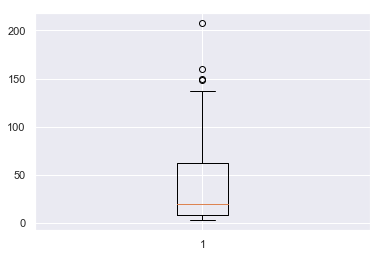

In [189]:
# outlier treatment for child_mort
sns.set(font_scale = 1)
plt.boxplot(country_data.child_mort)
Q1 = country_data.child_mort.quantile(0.25)
Q3 = country_data.child_mort.quantile(0.75)
IQR = Q3 - Q1
country_data_child_mort_outliers = country_data[(country_data.child_mort < Q1 - 1.5*IQR) | (country_data.child_mort > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.child_mort >= Q1 - 1.5*IQR) & (country_data.child_mort <= Q3 + 1.5*IQR)]

In [190]:
country_data_child_mort_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399


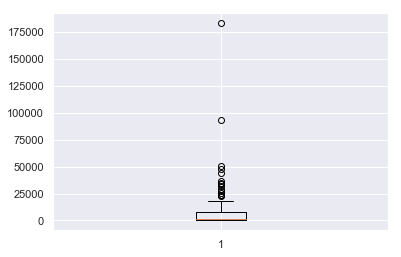

In [191]:
# outlier treatment for exports
sns.set(font_scale = 1)
plt.boxplot(country_data.exports)
Q1 = country_data.exports.quantile(0.25)
Q3 = country_data.exports.quantile(0.75)
IQR = Q3 - Q1
country_data_exports_outliers = country_data[(country_data.exports < Q1 - 1.5*IQR) | (country_data.exports > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.exports >= Q1 - 1.5*IQR) & (country_data.exports <= Q3 + 1.5*IQR)]

In [192]:
country_data_exports_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300


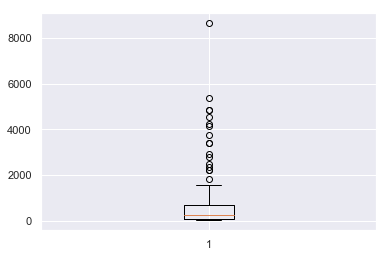

In [193]:
# outlier treatment for health
sns.set(font_scale = 1)
plt.boxplot(country_data.health)
Q1 = country_data.health.quantile(0.25)
Q3 = country_data.health.quantile(0.75)
IQR = Q3 - Q1
country_data_health_outliers = country_data[(country_data.health < Q1 - 1.5*IQR) | (country_data.health > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.health >= Q1 - 1.5*IQR) & (country_data.health <= Q3 + 1.5*IQR)]

In [194]:
country_data_health_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800
60,Greece,3.9,5944.9,2770.70,8258.3,28700,0.673,80.4,1.48,26900
74,Israel,4.6,10710.0,2334.78,10067.4,29600,1.770,81.4,3.03,30600
75,Italy,4.0,9021.6,3411.74,9737.6,36200,0.319,81.7,1.46,35800


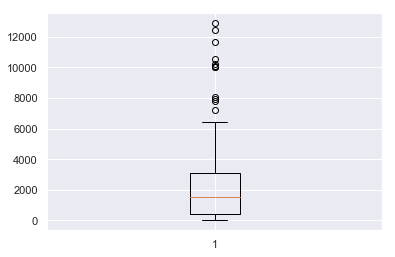

In [195]:
# outlier treatment for imports
sns.set(font_scale = 1)
plt.boxplot(country_data.imports)
Q1 = country_data.imports.quantile(0.25)
Q3 = country_data.imports.quantile(0.75)
IQR = Q3 - Q1
country_data_imports_outliers = country_data[(country_data.imports < Q1 - 1.5*IQR) | (country_data.imports > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.imports >= Q1 - 1.5*IQR) & (country_data.imports <= Q3 + 1.5*IQR)]

In [196]:
country_data_imports_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,10.3,5551.0,735.66,7185.8,19100,1.440,76.8,2.13,12200
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700
13,Barbados,14.2,6320.0,1275.20,7792.0,15300,0.321,76.7,1.78,16000
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800
49,Equatorial Guinea,111.0,14671.8,766.08,10071.9,33700,24.900,60.9,5.21,17100
51,Estonia,4.5,10964.6,880.38,10030.2,22700,1.740,76.0,1.72,14600
67,Hungary,6.0,10715.8,960.23,10021.5,22300,2.330,74.5,1.25,13100
90,Lithuania,6.1,7836.0,844.80,8064.0,21100,2.380,73.2,1.50,12000
115,Oman,11.7,12680.1,534.61,7951.6,45300,15.600,76.1,2.90,19300
131,Seychelles,14.4,10130.4,367.20,11664.0,20400,-4.210,73.4,2.17,10800


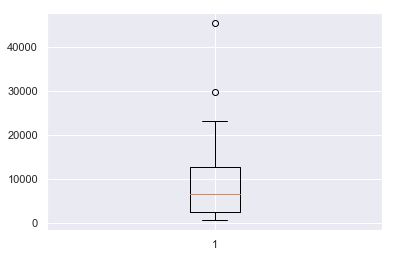

In [197]:
# outlier treatment for income
sns.set(font_scale = 1)
plt.boxplot(country_data.income)
Q1 = country_data.income.quantile(0.25)
Q3 = country_data.income.quantile(0.75)
IQR = Q3 - Q1
country_data_income_outliers = country_data[(country_data.income < Q1 - 1.5*IQR) | (country_data.income > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.income >= Q1 - 1.5*IQR) & (country_data.income <= Q3 + 1.5*IQR)]

In [198]:
country_data_income_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
89,Libya,16.6,7937.6,469.48,5094.1,29600,14.2,76.1,2.41,12100
128,Saudi Arabia,15.7,9572.8,827.97,6369.0,45400,17.2,75.1,2.96,19300


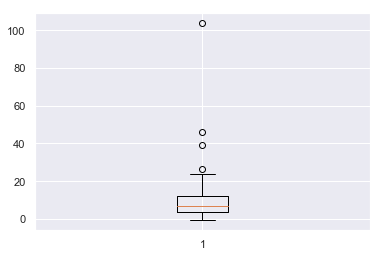

In [199]:
# outlier treatment for inflation
sns.set(font_scale = 1)
plt.boxplot(country_data.inflation)
Q1 = country_data.inflation.quantile(0.25)
Q3 = country_data.inflation.quantile(0.75)
IQR = Q3 - Q1
country_data_inflation_outliers = country_data[(country_data.inflation < Q1 - 1.5*IQR) | (country_data.inflation > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.inflation >= Q1 - 1.5*IQR) & (country_data.inflation <= Q3 + 1.5*IQR)]

In [200]:
country_data_inflation_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
103,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330
149,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.5,71.1,6.23,3600
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500


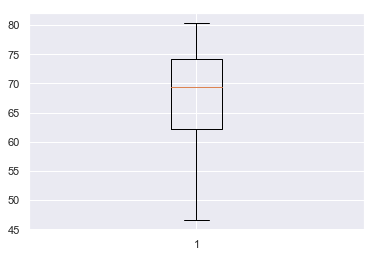

In [201]:
# outlier treatment for life_expec
sns.set(font_scale = 1)
plt.boxplot(country_data.life_expec)
Q1 = country_data.life_expec.quantile(0.25)
Q3 = country_data.life_expec.quantile(0.75)
IQR = Q3 - Q1
country_data_life_expec_outliers = country_data[(country_data.life_expec < Q1 - 1.5*IQR) | (country_data.life_expec > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.life_expec >= Q1 - 1.5*IQR) & (country_data.life_expec <= Q3 + 1.5*IQR)]

In [202]:
country_data_life_expec_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


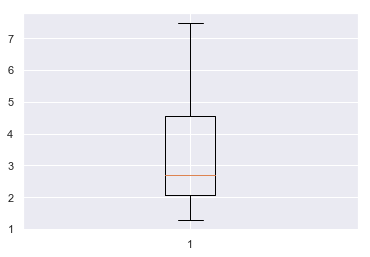

In [203]:
# outlier treatment for total_fer
sns.set(font_scale = 1)
plt.boxplot(country_data.total_fer)
Q1 = country_data.total_fer.quantile(0.25)
Q3 = country_data.total_fer.quantile(0.75)
IQR = Q3 - Q1
country_data_total_fer_outliers = country_data[(country_data.total_fer < Q1 - 1.5*IQR) | (country_data.total_fer > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.total_fer >= Q1 - 1.5*IQR) & (country_data.total_fer <= Q3 + 1.5*IQR)]

In [204]:
country_data_total_fer_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


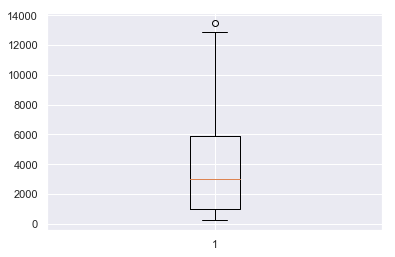

In [205]:
# outlier treatment for gdpp
sns.set(font_scale = 1)
plt.boxplot(country_data.gdpp)
Q1 = country_data.gdpp.quantile(0.25)
Q3 = country_data.gdpp.quantile(0.75)
IQR = Q3 - Q1
country_data_gdpp_outliers = country_data[(country_data.gdpp < Q1 - 1.5*IQR) | (country_data.gdpp > Q3 + 1.5*IQR)]
country_data = country_data[(country_data.gdpp >= Q1 - 1.5*IQR) & (country_data.gdpp <= Q3 + 1.5*IQR)]

In [206]:
country_data_gdpp_outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
41,Croatia,5.5,5076.0,1047.6,5143.5,20100,0.821,76.3,1.55,13500


In [207]:
len(country_data_child_mort_outliers)+len(country_data_exports_outliers)+len(country_data_health_outliers)+len(country_data_imports_outliers)+len(country_data_income_outliers)+len(country_data_inflation_outliers)+len(country_data_life_expec_outliers)+len(country_data_total_fer_outliers)+len(country_data_gdpp_outliers)

56

In [208]:
56/167 *100

33.532934131736525

#### 33% data has been removed due to outlier treatment, but we will assign  each of these records to clusters, post clustering, based on min distance out of distance from all cluster centroids.

In [209]:
outlier_data_all = pd.concat([country_data_child_mort_outliers, country_data_exports_outliers, country_data_health_outliers, country_data_imports_outliers, country_data_income_outliers, country_data_inflation_outliers, country_data_life_expec_outliers, country_data_total_fer_outliers, country_data_gdpp_outliers], axis = 0)
outlier_data_all.reset_index(inplace=True)
outlier_data_all.drop('index',axis=1,inplace=True)

In [210]:
country_data.reset_index(inplace=True)
country_data.drop('index',axis=1,inplace=True)

#### Checking for colinearity through correlation plot heat map

In [211]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [212]:
# Putting numerical variable in X for the purpose of correlation plot
X = country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]


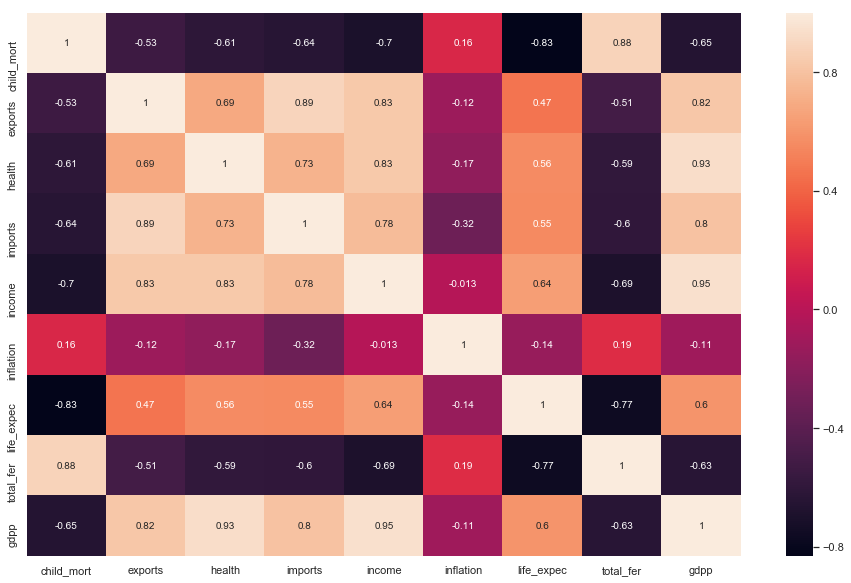

In [213]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

#### There are some very high correlations between income and gdpp, total fertility and child mortality etc. So the data is a good candidate for PCA.

In [214]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

In [215]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [216]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)


max corr: 0.945665945288714 , min corr:  -0.831907431977764


#### Standardizing the numerical data with StandardScaler as a preparation step for performing PCA

In [217]:
country_data_norm = country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data_norm = standard_scaler.fit_transform(country_data_norm)

In [218]:
pd.DataFrame(country_data_norm).head()

,0,1,2,3,4,5,6,7,8
0,1.288979,-0.911714,-0.827332,-0.934513,-1.049856,0.254067,-1.598014,1.687884,-0.997074
1,-0.845412,-0.209210,0.076099,0.235393,0.364316,-0.579757,1.130276,-1.084940,0.086256
2,-0.535113,0.156538,-0.251379,-0.159610,0.869134,1.375940,1.157423,-0.260407,0.199582
3,2.124175,0.470148,-0.592706,-0.082984,-0.320674,2.437170,-1.068645,1.913966,-0.085263
4,-0.906311,0.307403,2.340516,0.006893,1.854975,2.184496,1.062408,-0.606179,1.988287


In [219]:
pd.DataFrame(country_data_norm).describe()

,0,1,2,3,4,5,6,7,8
count,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02
mean,-3.140631e-16,-2.000402e-16,-3.700743e-17,-1.600321e-16,-1.600321e-17,1.320265e-16,6.401286e-16,2.800563e-16,2.400482e-17
std,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00
min,-1.167310e+00,-9.466642e-01,-9.436550e-01,-1.101074e+00,-1.219999e+00,-1.472875e+00,-2.914652e+00,-1.337620e+00,-1.095697e+00
25%,-8.120618e-01,-7.733856e-01,-7.790402e-01,-8.355510e-01,-8.985807e-01,-7.760005e-01,-8.107465e-01,-7.790650e-01,-8.540386e-01
50%,-3.553138e-01,-3.394109e-01,-3.410518e-01,-2.409179e-01,-2.288888e-01,-1.889546e-01,1.665515e-01,-3.800974e-01,-2.567828e-01
75%,5.755822e-01,4.063431e-01,4.868525e-01,4.781258e-01,6.651670e-01,5.758053e-01,8.316572e-01,8.633514e-01,5.625297e-01
max,2.646173e+00,4.132941e+00,3.110267e+00,3.229672e+00,2.602854e+00,2.639309e+00,1.686793e+00,2.798344e+00,2.784628e+00


#### Performing PCA on the dataframe containing standardized numerical variables.

In [220]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

country_data_pca = pca.fit_transform(country_data_norm)

In [221]:
country_data_pca_df = pd.DataFrame(country_data_pca)
country_data_pca_df.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']

In [222]:
country_data_pca.shape

(111, 9)

#### There are 9 principal components formed as there were total 9 numerical variables on which PCA was applied.

#### Checking for collinearity in the data after performing PCA.

In [223]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(country_data_pca.transpose())

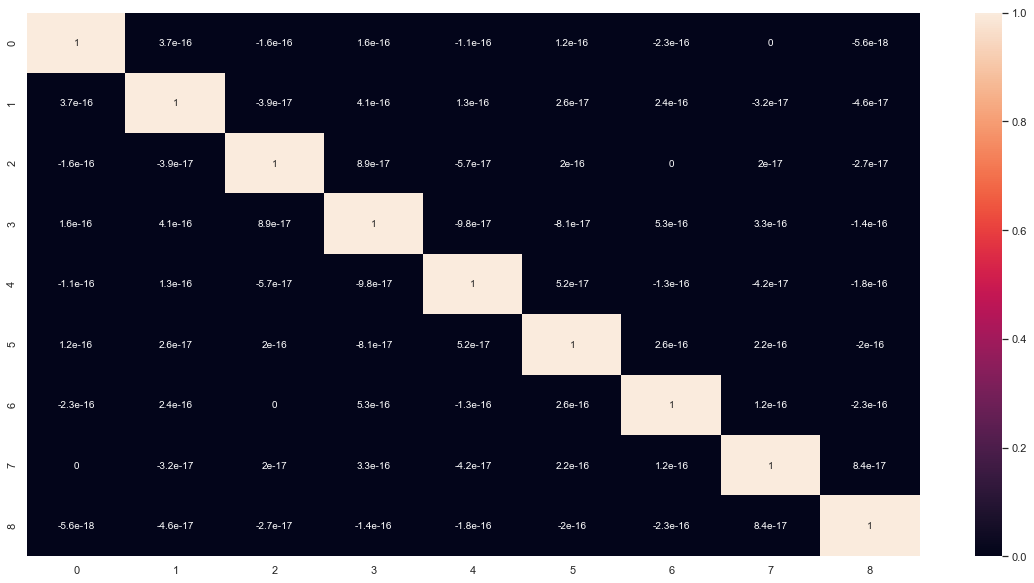

In [224]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [225]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 5.264110104758259e-16 , min corr:  -2.3195213852494667e-16


#### As we can see in the heat map and the values for min and max correlation coefficients values, the values are almost 0 which means there is no collinearity between the variables post PCA.

#### Now comes the part to decide how many principal components will be required based on how much variance is needed to be described.

In [226]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'] })
components

,PC1,PC2,Feature
0,-0.344691,0.324178,child_mort
1,0.341885,0.316461,exports
2,0.354971,0.179593,health
3,0.358881,0.071208,imports
4,0.380524,0.247230,income
5,-0.085045,0.628241,inflation
6,0.317313,-0.346241,life_expec
7,-0.334687,0.340715,total_fer
8,0.380485,0.256236,gdpp


In [227]:
colnames = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],'Feature':colnames})

In [228]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.344691,0.324178,-0.311780,0.107447,-0.162664,0.453278,-0.647492,-0.122767,0.033269,child_mort
1,0.341885,0.316461,-0.242407,-0.516889,-0.056847,0.191609,0.029414,0.633401,-0.122570,exports
2,0.354971,0.179593,-0.125690,0.646007,-0.014354,-0.374610,-0.256465,0.249236,-0.374416,health
3,0.358881,0.071208,-0.312791,-0.422553,-0.030711,-0.469388,-0.292174,-0.527432,0.070188,imports
4,0.380524,0.247230,0.051293,0.083169,0.056235,0.500773,0.316629,-0.487501,-0.438958,income
5,-0.085045,0.628241,0.718122,-0.133859,0.013381,-0.202467,-0.146516,-0.026679,0.033347,inflation
6,0.317313,-0.346241,0.348171,-0.023240,-0.766182,0.150417,-0.218013,0.014941,0.015935,life_expec
7,-0.334687,0.340715,-0.288493,0.054175,-0.615381,-0.253376,0.483716,-0.069173,-0.063838,total_fer
8,0.380485,0.256236,-0.087260,0.311601,-0.009510,0.136293,0.159741,-0.007120,0.800394,gdpp


In [229]:
pca.explained_variance_

array([6.0318786 , 1.07804424, 1.01786652, 0.39586083, 0.24060649,
       0.1430725 , 0.09286298, 0.06001787, 0.02160814])

In [230]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [66.4 11.9 11.2  4.4  2.6  1.6  1.   0.7  0.2]


In [231]:
print (pca.explained_variance_ratio_.cumsum())

[0.66417082 0.78287439 0.89495178 0.93854006 0.96503327 0.980787
 0.99101215 0.99762072 1.        ]


#### As we can see above and from the SCREE plot below, around 96.5% variance is described by the first 5 principle components, so we will go ahead with choosing the first 5 PCs for further applying clustering algorihms.

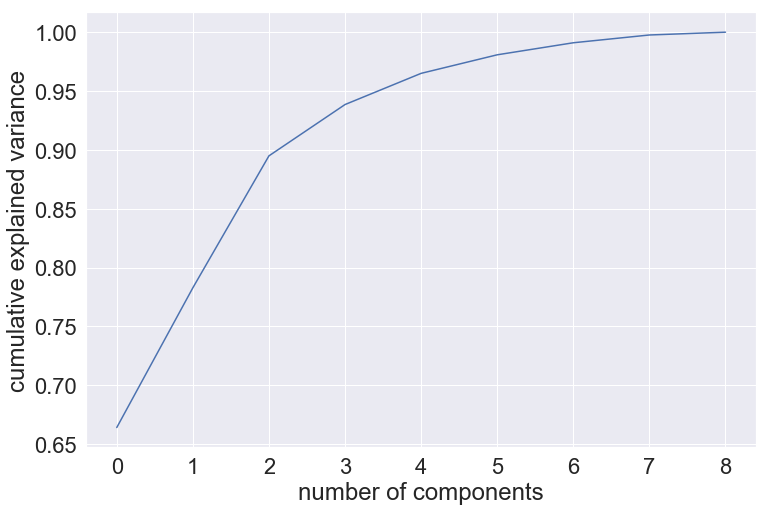

In [232]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
sns.set(font_scale = 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Since all the principal components are in orthogonal directions to each other, their dot products would be 0, the same is found below

In [233]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

-0.0

In [234]:
product = np.dot(pca.components_[0],pca.components_[2])
product.round(5)

0.0

In [235]:
product = np.dot(pca.components_[1],pca.components_[2])
product.round(5)

0.0

#### Plotting Scatterplots  between some principle components to see if there are any cluster patterns which are vsible.

Text(0, 0.5, 'Principal Component 2')

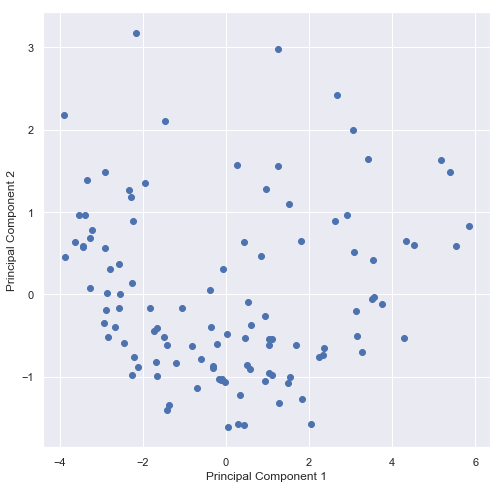

In [236]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
sns.set(font_scale = 1)
plt.scatter(country_data_pca_df.PC1, country_data_pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 3')

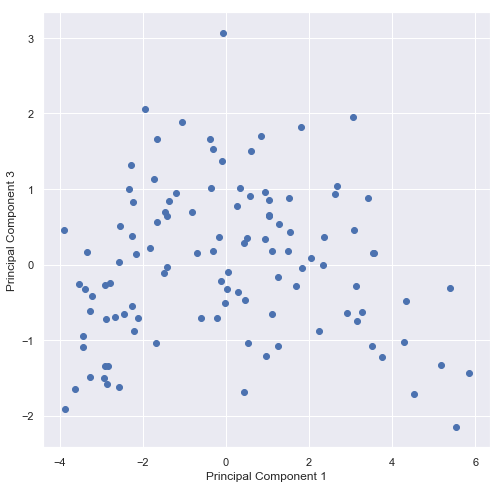

In [237]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
sns.set(font_scale = 1)
plt.scatter(country_data_pca_df.PC1, country_data_pca_df.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

Text(0, 0.5, 'Principal Component 3')

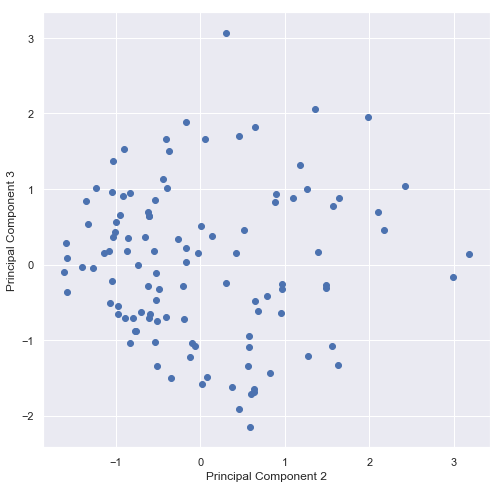

In [238]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
sns.set(font_scale = 1)
plt.scatter(country_data_pca_df.PC2, country_data_pca_df.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

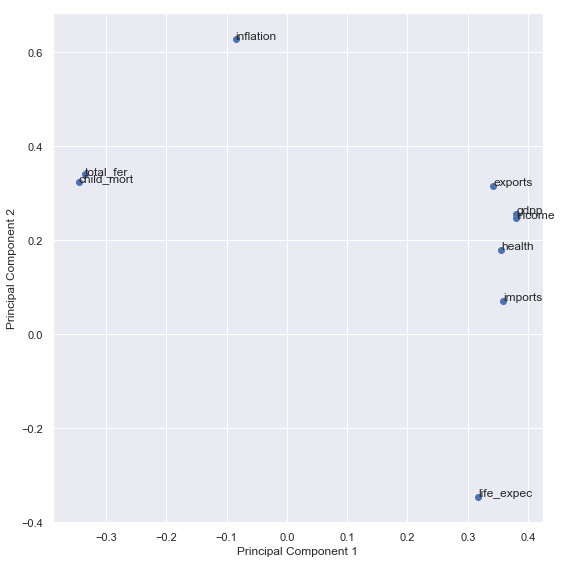

In [239]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
sns.set(font_scale = 1)
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

#### As was decided based on 96.5% variance explained by 5 principle components, doing PCA again with only 5 PCs.

In [240]:
pca_again = PCA(n_components=5)

In [241]:
country_data_pca_5 = pca_again.fit_transform(country_data_norm)

In [242]:
country_data_pca_5.shape

(111, 5)

In [243]:
colnames = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
pca_df = pd.DataFrame({'PC1':pca_again.components_[0],'PC2':pca_again.components_[1],'PC3':pca_again.components_[2],
                       'PC4':pca_again.components_[3],'PC5':pca_again.components_[4],'Feature':colnames})

In [244]:
pca_df

,PC1,PC2,PC3,PC4,PC5,Feature
0,-0.344691,0.324178,-0.311780,0.107447,-0.162664,child_mort
1,0.341885,0.316461,-0.242407,-0.516889,-0.056847,exports
2,0.354971,0.179593,-0.125690,0.646007,-0.014354,health
3,0.358881,0.071208,-0.312791,-0.422553,-0.030711,imports
4,0.380524,0.247230,0.051293,0.083169,0.056235,income
5,-0.085045,0.628241,0.718122,-0.133859,0.013381,inflation
6,0.317313,-0.346241,0.348171,-0.023240,-0.766182,life_expec
7,-0.334687,0.340715,-0.288493,0.054175,-0.615381,total_fer
8,0.380485,0.256236,-0.087260,0.311601,-0.009510,gdpp


In [245]:
pca_again.explained_variance_

array([6.0318786 , 1.07804424, 1.01786652, 0.39586083, 0.24060649])

In [246]:
print (pca_again.explained_variance_ratio_.cumsum())

[0.66417082 0.78287439 0.89495178 0.93854006 0.96503327]


#### Going ahead with Hierarchical clustering on the Dataset on which PCA is appled with 5 components.
#### I am using complete linkage here, which is the maximum distance between datapoints in the 2 clusters while deciding to merge clusters, but there are other linkage methods like single(minimum distance), average(average distance between all datapoints in the 2 clusters) which can also be used by looking at their dendograms whether they are giving proper clusters which can be segragated.

#### Importing the libraries required to perform hierarchical clustering.

In [247]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Plotting the dendrogram

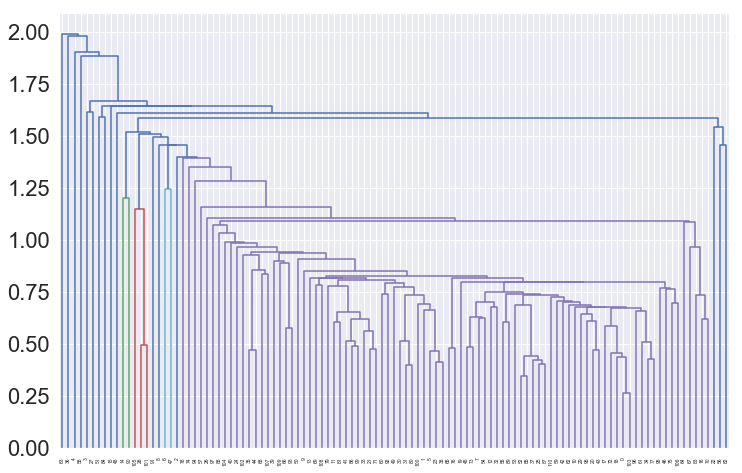

In [248]:
fig = plt.figure(figsize = (12,8))
sns.set(font_scale = 2)
mergings = linkage(country_data_pca_5, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### With Single Linkage we don't see cluster formations which can be properly segragated by cutting the tree horizontally at any level hence we will try for complete linkage.

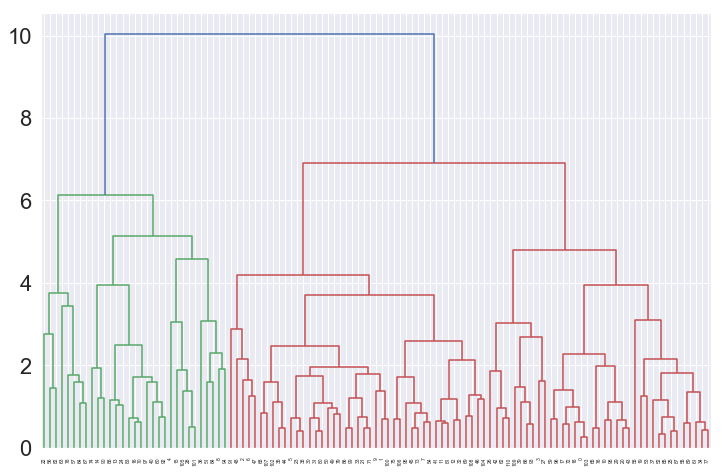

In [249]:
fig = plt.figure(figsize = (12,8))
sns.set(font_scale = 2)
mergings = linkage(country_data_pca_5, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Dendogram of complete linkage clusters is better in terms that it can be segragated into proper clusters.
#### Looking at the dendrogram, 4 looks like the perfect value for number of clusters but we will try various other options.

#### We will cut the dendrogram at various number of clusters from  7 to 3, and analyze the clusters formed.

#### Also we will store the cluster centroids(which will be the mean of each of the 5 principle components grouped by each cluster id) for each of these cluster formations from 7 to 3 and then perform k-means clustering by providng these cluster centroids as input to k-means with k varing from 7 to 3.

#### Cutting the dendrogram at the formation of 7 clusters.

In [250]:
clusterCut7 = pd.Series(cut_tree(mergings, n_clusters = 7).reshape(-1,))
country_hc7 = pd.concat([country_data, clusterCut7], axis=1)
country_hc7.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']


In [251]:
hc7_cluster_count = pd.concat([pd.Series([0,1,2,3,4,5,6]),pd.DataFrame(country_hc7.groupby(["ClusterID"]).size())], axis=1)
hc7_cluster_count.columns = ['ClusterID','Count']
hc7_cluster_count

,ClusterID,Count
0,0,27
1,1,43
2,2,10
3,3,5
4,4,5
5,5,13
6,6,8


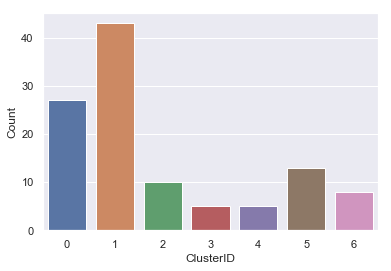

In [252]:
sns.set(font_scale = 1)
sns.barplot(x=hc7_cluster_count.ClusterID, y=hc7_cluster_count.Count)

In [253]:
hc7_clusters_child_mort = pd.DataFrame(country_hc7.groupby(["ClusterID"]).child_mort.mean())
hc7_clusters_exports = pd.DataFrame(country_hc7.groupby(["ClusterID"]).exports.mean())
hc7_clusters_health = pd.DataFrame(country_hc7.groupby(["ClusterID"]).health.mean())
hc7_clusters_imports = pd.DataFrame(country_hc7.groupby(["ClusterID"]).imports.mean())
hc7_clusters_income = pd.DataFrame(country_hc7.groupby(["ClusterID"]).income.mean())
hc7_clusters_inflation = pd.DataFrame(country_hc7.groupby(["ClusterID"]).inflation.mean())
hc7_clusters_life_expec = pd.DataFrame(country_hc7.groupby(["ClusterID"]).life_expec.mean())
hc7_clusters_total_fer = pd.DataFrame(country_hc7.groupby(["ClusterID"]).total_fer.mean())
hc7_clusters_gdpp = pd.DataFrame(country_hc7.groupby(["ClusterID"]).gdpp.mean())
hc7_cluster_means = pd.concat([pd.Series([0,1,2,3,4,5,6]), hc7_clusters_child_mort, hc7_clusters_exports, hc7_clusters_health, hc7_clusters_imports, hc7_clusters_income, hc7_clusters_inflation, hc7_clusters_life_expec, hc7_clusters_total_fer, hc7_clusters_gdpp], axis=1)
hc7_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
hc7_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,85.988889,199.506778,49.903093,367.065037,1854.296296,5.613889,60.022222,4.988148,757.518519
1,1,30.176744,1134.279826,182.967456,1367.678397,7293.488372,8.197233,71.293023,2.642326,3132.232558
2,2,88.660000,718.881000,62.531290,611.097100,3142.900000,18.480000,60.530000,5.250000,1447.100000
3,3,14.840000,2236.000000,890.410000,2318.140000,16260.000000,9.560000,77.000000,2.064000,10460.000000
4,4,24.960000,3927.802000,431.805200,2739.986000,17800.000000,14.520000,68.240000,2.452000,8570.000000
5,5,21.923077,2205.970769,449.656308,2952.920769,12323.076923,3.634615,70.415385,2.003846,6158.461538
6,6,11.075000,5287.413750,665.822625,5409.997500,17337.500000,2.989500,76.487500,1.853750,9738.750000


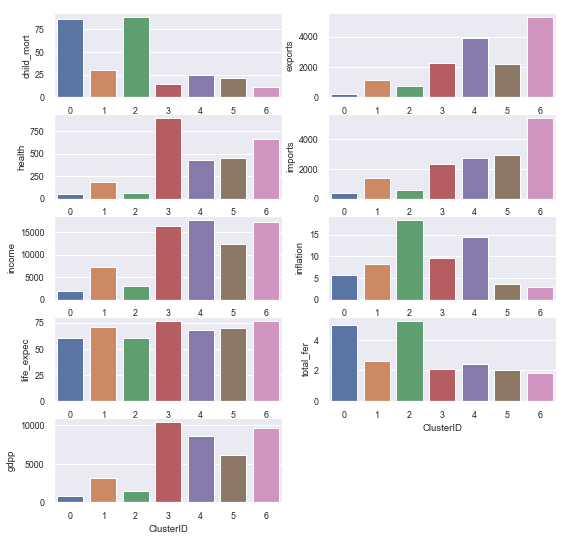

In [254]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=hc7_cluster_means.ClusterID, y=hc7_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### We will store the cluster centroids, so that while performing kmeans with k=7, we can provide these as initial  cluster centroids as part of input.

#### Saving the initial cluster centroids for k=7

In [255]:
#country_data_pca_5
country_data_pca_5_hc7 = pd.concat([pd.DataFrame(country_data_pca_5), clusterCut7], axis=1)
country_data_pca_5_hc7.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
country_data_pca_5_hc7_init_cc = country_data_pca_5_hc7.groupby('ClusterID').mean()
#country_hc7_df = country_hc7.groupby('ClusterID').mean()
#country_hc7_df

#### Cutting the dendogram at the formation of 6 clusters.

In [256]:
clusterCut6 = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
country_hc6 = pd.concat([country_data, clusterCut6], axis=1)
country_hc6.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']


In [257]:
hc6_cluster_count = pd.concat([pd.Series([0,1,2,3,4,5]),pd.DataFrame(country_hc6.groupby(["ClusterID"]).size())], axis=1)
hc6_cluster_count.columns = ['ClusterID','Count']
hc6_cluster_count

,ClusterID,Count
0,0,27
1,1,43
2,2,10
3,3,10
4,4,13
5,5,8


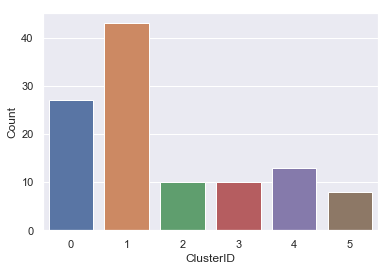

In [258]:
sns.set(font_scale = 1)
sns.barplot(x=hc6_cluster_count.ClusterID, y=hc6_cluster_count.Count)

In [259]:
hc6_clusters_child_mort = pd.DataFrame(country_hc6.groupby(["ClusterID"]).child_mort.mean())
hc6_clusters_exports = pd.DataFrame(country_hc6.groupby(["ClusterID"]).exports.mean())
hc6_clusters_health = pd.DataFrame(country_hc6.groupby(["ClusterID"]).health.mean())
hc6_clusters_imports = pd.DataFrame(country_hc6.groupby(["ClusterID"]).imports.mean())
hc6_clusters_income = pd.DataFrame(country_hc6.groupby(["ClusterID"]).income.mean())
hc6_clusters_inflation = pd.DataFrame(country_hc6.groupby(["ClusterID"]).inflation.mean())
hc6_clusters_life_expec = pd.DataFrame(country_hc6.groupby(["ClusterID"]).life_expec.mean())
hc6_clusters_total_fer = pd.DataFrame(country_hc6.groupby(["ClusterID"]).total_fer.mean())
hc6_clusters_gdpp = pd.DataFrame(country_hc6.groupby(["ClusterID"]).gdpp.mean())
hc6_cluster_means = pd.concat([pd.Series([0,1,2,3,4,5]), hc6_clusters_child_mort, hc6_clusters_exports, hc6_clusters_health, hc6_clusters_imports, hc6_clusters_income, hc6_clusters_inflation, hc6_clusters_life_expec, hc6_clusters_total_fer, hc6_clusters_gdpp], axis=1)
hc6_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
hc6_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,85.988889,199.506778,49.903093,367.065037,1854.296296,5.613889,60.022222,4.988148,757.518519
1,1,30.176744,1134.279826,182.967456,1367.678397,7293.488372,8.197233,71.293023,2.642326,3132.232558
2,2,88.660000,718.881000,62.531290,611.097100,3142.900000,18.480000,60.530000,5.250000,1447.100000
3,3,19.900000,3081.901000,661.107600,2529.063000,17030.000000,12.040000,72.620000,2.258000,9515.000000
4,4,21.923077,2205.970769,449.656308,2952.920769,12323.076923,3.634615,70.415385,2.003846,6158.461538
5,5,11.075000,5287.413750,665.822625,5409.997500,17337.500000,2.989500,76.487500,1.853750,9738.750000


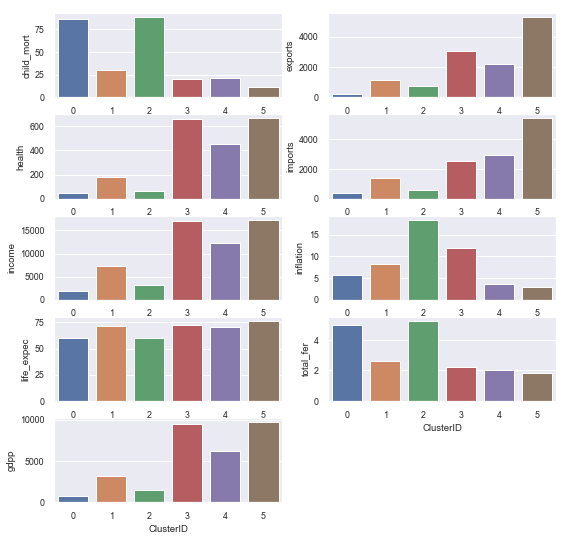

In [260]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=hc6_cluster_means.ClusterID, y=hc6_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Saving the initial cluster centroids for k=6

In [261]:
#country_hc6_df = country_hc6.groupby('ClusterID').mean()
#country_hc6_df
country_data_pca_5_hc6= pd.concat([pd.DataFrame(country_data_pca_5), clusterCut6], axis=1)
country_data_pca_5_hc6.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
country_data_pca_5_hc6_init_cc = country_data_pca_5_hc6.groupby('ClusterID').mean()

#### Cutting the dendogram at the formation of 5 clusters.

In [262]:
clusterCut5 = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
country_hc5 = pd.concat([country_data, clusterCut5], axis=1)
country_hc5.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']


In [263]:
hc5_cluster_count = pd.concat([pd.Series([0,1,2,3,4]),pd.DataFrame(country_hc5.groupby(["ClusterID"]).size())], axis=1)
hc5_cluster_count.columns = ['ClusterID','Count']
hc5_cluster_count

,ClusterID,Count
0,0,37
1,1,43
2,2,10
3,3,13
4,4,8


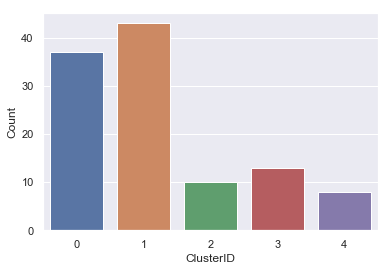

In [264]:
sns.set(font_scale = 1)
sns.barplot(x=hc5_cluster_count.ClusterID, y=hc5_cluster_count.Count)

In [265]:
hc5_clusters_child_mort = pd.DataFrame(country_hc5.groupby(["ClusterID"]).child_mort.mean())
hc5_clusters_exports = pd.DataFrame(country_hc5.groupby(["ClusterID"]).exports.mean())
hc5_clusters_health = pd.DataFrame(country_hc5.groupby(["ClusterID"]).health.mean())
hc5_clusters_imports = pd.DataFrame(country_hc5.groupby(["ClusterID"]).imports.mean())
hc5_clusters_income = pd.DataFrame(country_hc5.groupby(["ClusterID"]).income.mean())
hc5_clusters_inflation = pd.DataFrame(country_hc5.groupby(["ClusterID"]).inflation.mean())
hc5_clusters_life_expec = pd.DataFrame(country_hc5.groupby(["ClusterID"]).life_expec.mean())
hc5_clusters_total_fer = pd.DataFrame(country_hc5.groupby(["ClusterID"]).total_fer.mean())
hc5_clusters_gdpp = pd.DataFrame(country_hc5.groupby(["ClusterID"]).gdpp.mean())
hc5_cluster_means = pd.concat([pd.Series([0,1,2,3,4]), hc5_clusters_child_mort, hc5_clusters_exports, hc5_clusters_health, hc5_clusters_imports, hc5_clusters_income, hc5_clusters_inflation, hc5_clusters_life_expec, hc5_clusters_total_fer, hc5_clusters_gdpp], axis=1)
hc5_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
hc5_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,86.710811,339.878189,53.316119,433.019649,2202.567568,9.091216,60.159459,5.058919,943.891892
1,1,30.176744,1134.279826,182.967456,1367.678397,7293.488372,8.197233,71.293023,2.642326,3132.232558
2,2,19.900000,3081.901000,661.107600,2529.063000,17030.000000,12.040000,72.620000,2.258000,9515.000000
3,3,21.923077,2205.970769,449.656308,2952.920769,12323.076923,3.634615,70.415385,2.003846,6158.461538
4,4,11.075000,5287.413750,665.822625,5409.997500,17337.500000,2.989500,76.487500,1.853750,9738.750000


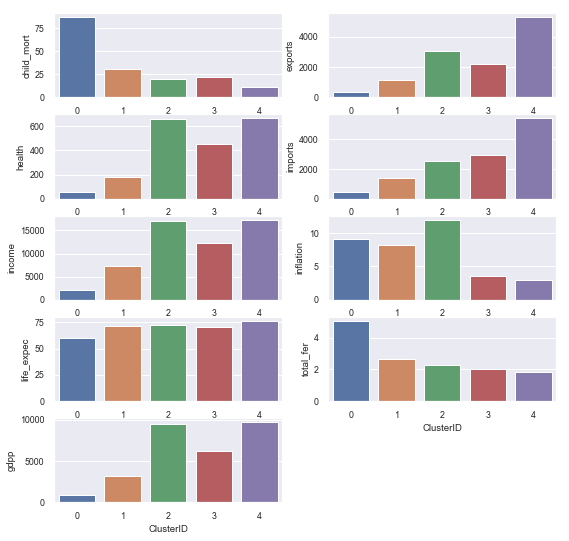

In [266]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=hc5_cluster_means.ClusterID, y=hc5_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Saving the initial cluster centroids for k=5

In [267]:
#country_hc5_df = country_hc5.groupby('ClusterID').mean()
#country_hc5_df
country_data_pca_5_hc5= pd.concat([pd.DataFrame(country_data_pca_5), clusterCut5], axis=1)
country_data_pca_5_hc5.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
country_data_pca_5_hc5_init_cc = country_data_pca_5_hc5.groupby('ClusterID').mean()

#### Cutting the dendogram at the formation of 4 clusters.

In [268]:
clusterCut4 = pd.Series(cut_tree(mergings, n_clusters =4).reshape(-1,))
country_hc4 = pd.concat([country_data, clusterCut4], axis=1)
country_hc4.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp' ,'ClusterID']

In [269]:
hc4_cluster_count = pd.concat([pd.Series([0,1,2,3]),pd.DataFrame(country_hc4.groupby(["ClusterID"]).size())], axis=1)
hc4_cluster_count.columns = ['ClusterID','Count']
hc4_cluster_count

,ClusterID,Count
0,0,37
1,1,43
2,2,23
3,3,8


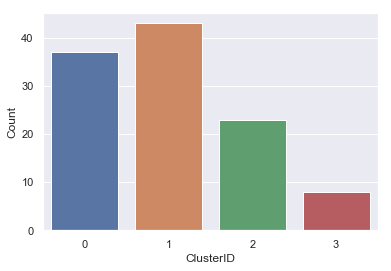

In [270]:
sns.set(font_scale = 1)
sns.barplot(x=hc4_cluster_count.ClusterID, y=hc4_cluster_count.Count)

In [271]:
hc4_clusters_child_mort = pd.DataFrame(country_hc4.groupby(["ClusterID"]).child_mort.mean())
hc4_clusters_exports = pd.DataFrame(country_hc4.groupby(["ClusterID"]).exports.mean())
hc4_clusters_health = pd.DataFrame(country_hc4.groupby(["ClusterID"]).health.mean())
hc4_clusters_imports = pd.DataFrame(country_hc4.groupby(["ClusterID"]).imports.mean())
hc4_clusters_income = pd.DataFrame(country_hc4.groupby(["ClusterID"]).income.mean())
hc4_clusters_inflation = pd.DataFrame(country_hc4.groupby(["ClusterID"]).inflation.mean())
hc4_clusters_life_expec = pd.DataFrame(country_hc4.groupby(["ClusterID"]).life_expec.mean())
hc4_clusters_total_fer = pd.DataFrame(country_hc4.groupby(["ClusterID"]).total_fer.mean())
hc4_clusters_gdpp = pd.DataFrame(country_hc4.groupby(["ClusterID"]).gdpp.mean())
hc4_cluster_means = pd.concat([pd.Series([0,1,2,3]), hc4_clusters_child_mort, hc4_clusters_exports, hc4_clusters_health, hc4_clusters_imports, hc4_clusters_income, hc4_clusters_inflation, hc4_clusters_life_expec, hc4_clusters_total_fer, hc4_clusters_gdpp], axis=1)
hc4_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
hc4_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,86.710811,339.878189,53.316119,433.019649,2202.567568,9.091216,60.159459,5.058919,943.891892
1,1,30.176744,1134.279826,182.967456,1367.678397,7293.488372,8.197233,71.293023,2.642326,3132.232558
2,2,21.043478,2586.810000,541.591652,2768.634783,14369.565217,7.289130,71.373913,2.114348,7617.826087
3,3,11.075000,5287.413750,665.822625,5409.997500,17337.500000,2.989500,76.487500,1.853750,9738.750000


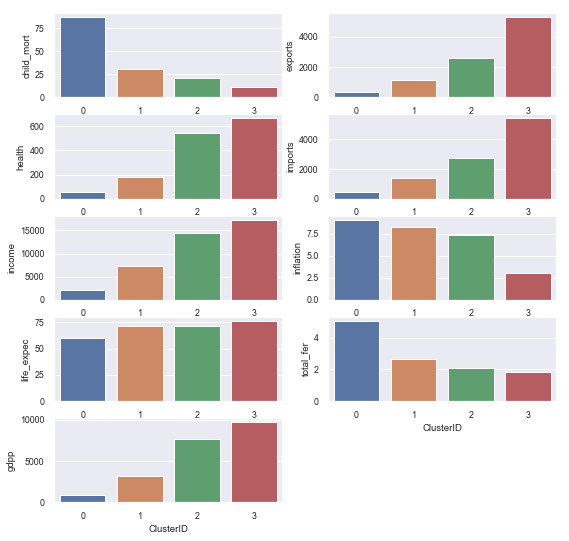

In [272]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=hc4_cluster_means.ClusterID, y=hc4_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Clusters formed through Hierarchical with k=4 give a good distinction between countries with cluster 3 for richer/healthier countries upto cluster 0 which are the countries poor in terms of both wealth/wealth/high inflation, but we will look at clusters for all options.

#### Saving the initial cluster centroids for k=4

In [273]:
country_data_pca_5_hc4= pd.concat([pd.DataFrame(country_data_pca_5), clusterCut4], axis=1)
country_data_pca_5_hc4.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
country_data_pca_5_hc4_init_cc = country_data_pca_5_hc4.groupby('ClusterID').mean()

#### Cutting the dendogram at the formation of 3 clusters.

In [274]:
clusterCut3 = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
country_hc3 = pd.concat([country_data, clusterCut3], axis=1)
country_hc3.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [275]:
hc3_cluster_count = pd.concat([pd.Series([0,1,2]),pd.DataFrame(country_hc3.groupby(["ClusterID"]).size())], axis=1)
hc3_cluster_count.columns = ['ClusterID','Count']
hc3_cluster_count

,ClusterID,Count
0,0,37
1,1,43
2,2,31


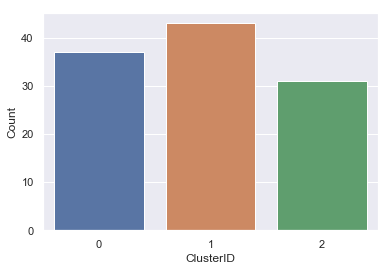

In [276]:
sns.set(font_scale = 1)
sns.barplot(x=hc3_cluster_count.ClusterID, y=hc3_cluster_count.Count)

In [277]:
hc3_clusters_child_mort = pd.DataFrame(country_hc3.groupby(["ClusterID"]).child_mort.mean())
hc3_clusters_exports = pd.DataFrame(country_hc3.groupby(["ClusterID"]).exports.mean())
hc3_clusters_health = pd.DataFrame(country_hc3.groupby(["ClusterID"]).health.mean())
hc3_clusters_imports = pd.DataFrame(country_hc3.groupby(["ClusterID"]).imports.mean())
hc3_clusters_income = pd.DataFrame(country_hc3.groupby(["ClusterID"]).income.mean())
hc3_clusters_inflation = pd.DataFrame(country_hc3.groupby(["ClusterID"]).inflation.mean())
hc3_clusters_life_expec = pd.DataFrame(country_hc3.groupby(["ClusterID"]).life_expec.mean())
hc3_clusters_total_fer = pd.DataFrame(country_hc3.groupby(["ClusterID"]).total_fer.mean())
hc3_clusters_gdpp = pd.DataFrame(country_hc3.groupby(["ClusterID"]).gdpp.mean())
hc3_cluster_means = pd.concat([pd.Series([0,1,2]), hc3_clusters_child_mort, hc3_clusters_exports, hc3_clusters_health, hc3_clusters_imports, hc3_clusters_income, hc3_clusters_inflation, hc3_clusters_life_expec, hc3_clusters_total_fer, hc3_clusters_gdpp], axis=1)
hc3_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
hc3_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,86.710811,339.878189,53.316119,433.019649,2202.567568,9.091216,60.159459,5.058919,943.891892
1,1,30.176744,1134.279826,182.967456,1367.678397,7293.488372,8.197233,71.293023,2.642326,3132.232558
2,2,18.470968,3283.740000,573.651258,3450.276774,15135.483871,6.179548,72.693548,2.047097,8165.161290


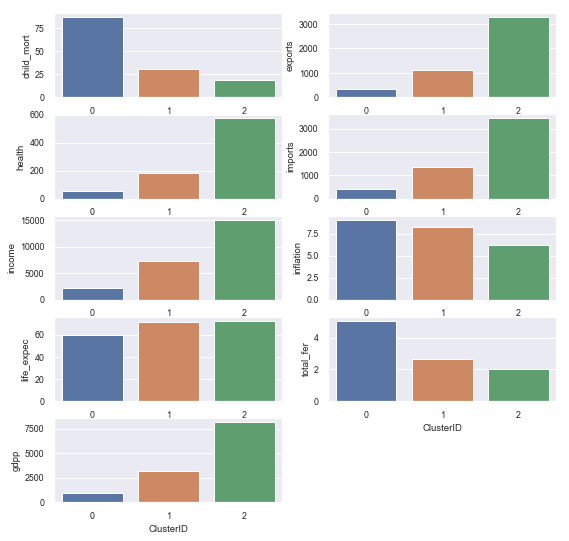

In [278]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=hc3_cluster_means.ClusterID, y=hc3_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Saving the initial cluster centroids for k=3

In [279]:
#country_hc3_df = country_hc3.groupby('ClusterID').mean()
#country_hc3_df
country_data_pca_5_hc3= pd.concat([pd.DataFrame(country_data_pca_5), clusterCut3], axis=1)
country_data_pca_5_hc3.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
country_data_pca_5_hc3_init_cc = country_data_pca_5_hc3.groupby('ClusterID').mean()

#### Cutting the dendogram at the formation of 2 clusters.

In [280]:
clusterCut2 = pd.Series(cut_tree(mergings, n_clusters = 2).reshape(-1,))
country_hc2 = pd.concat([country_data, clusterCut2], axis=1)
country_hc2.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [281]:
hc2_cluster_count = pd.concat([pd.Series([0,1]),pd.DataFrame(country_hc2.groupby(["ClusterID"]).size())], axis=1)
hc2_cluster_count.columns = ['ClusterID','Count']
hc2_cluster_count

,ClusterID,Count
0,0,80
1,1,31


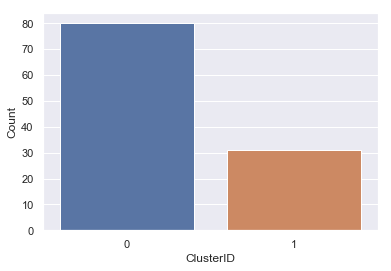

In [282]:
sns.set(font_scale = 1)
sns.barplot(x=hc2_cluster_count.ClusterID, y=hc2_cluster_count.Count)

In [283]:
hc2_clusters_child_mort = pd.DataFrame(country_hc2.groupby(["ClusterID"]).child_mort.mean())
hc2_clusters_exports = pd.DataFrame(country_hc2.groupby(["ClusterID"]).exports.mean())
hc2_clusters_health = pd.DataFrame(country_hc2.groupby(["ClusterID"]).health.mean())
hc2_clusters_imports = pd.DataFrame(country_hc2.groupby(["ClusterID"]).imports.mean())
hc2_clusters_income = pd.DataFrame(country_hc2.groupby(["ClusterID"]).income.mean())
hc2_clusters_inflation = pd.DataFrame(country_hc2.groupby(["ClusterID"]).inflation.mean())
hc2_clusters_life_expec = pd.DataFrame(country_hc2.groupby(["ClusterID"]).life_expec.mean())
hc2_clusters_total_fer = pd.DataFrame(country_hc2.groupby(["ClusterID"]).total_fer.mean())
hc2_clusters_gdpp = pd.DataFrame(country_hc2.groupby(["ClusterID"]).gdpp.mean())
hc2_cluster_means = pd.concat([pd.Series([0,1]), hc2_clusters_child_mort, hc2_clusters_exports, hc2_clusters_health, hc2_clusters_imports, hc2_clusters_income, hc2_clusters_inflation, hc2_clusters_life_expec, hc2_clusters_total_fer, hc2_clusters_gdpp], axis=1)
hc2_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
hc2_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,56.323750,766.869069,123.003712,935.398726,4938.937500,8.610700,66.143750,3.760000,2120.12500
1,1,18.470968,3283.740000,573.651258,3450.276774,15135.483871,6.179548,72.693548,2.047097,8165.16129


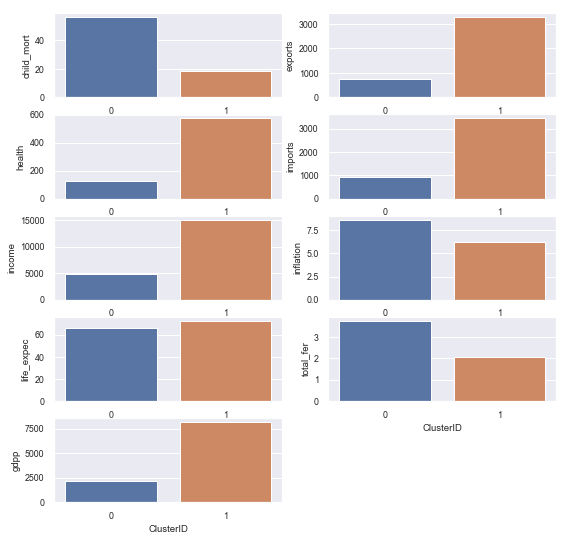

In [284]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=hc2_cluster_means.ClusterID, y=hc2_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Saving the initial cluster centroids for k=2

In [285]:
country_data_pca_5_hc2= pd.concat([pd.DataFrame(country_data_pca_5), clusterCut2], axis=1)
country_data_pca_5_hc2.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
country_data_pca_5_hc2_init_cc = country_data_pca_5_hc2.groupby('ClusterID').mean()


 #### Now we will check if k means(with initial cluster centroids from hierarchical clustering as input) gives us better clusters.

#### Importing the required libraries for performing KMeans Clustering.

In [286]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

#### Now we look at the different mertics used to choose the ideal value of k, first one being silhouette score.

#### Calculating the silhouette score for different values of k ranging from 2 to 15. 

In [287]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_data_pca_5)
    sse_.append([k, silhouette_score(country_data_pca_5, kmeans.labels_)])

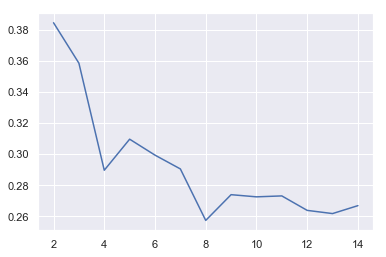

In [288]:
sns.set(font_scale = 1)
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Optimal value of k is when the Silhouette score is maximum, so here we find that the optimal value of k as per the Silhouette Score metric is 2.

#### The 2nd merric to choose optimal value of k, is the elbow curve formed by the sum of Squared distances.
#### Here the optimal k would at the elbow of the curve, somewhere around k=2,3 or 4.

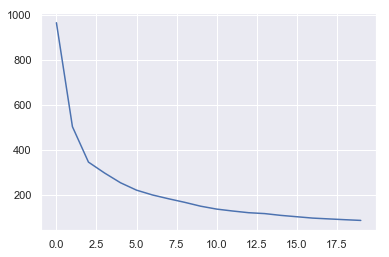

In [289]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_data_pca_5)
    ssd.append(model_clus.inertia_)
sns.set(font_scale = 1)
plt.plot(ssd)

#### Also we will look at Hopkins statistic to find cluster tendency of the dataset.
#### closer to zero would mean data is regularly spaced.
#### closer to 0.5 would mean data is random
#### closer to 1 would mean data has high tendency to form clusters.

In [290]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [291]:
hopkins(pd.DataFrame(country_data_pca_5))

0.7197701117938018

#### So cluster tendency of data after performing PCA is around 75%.

#### Now doing the K-means Clustering, with the initial value of cluster centroids from the hierarchical clustering done earlier.

#### K-Means with k=7

In [292]:
init = np.array(country_data_pca_5_hc7_init_cc,
                    np.float64)
init.shape
# Kmeans with K=7
model_clus7 = KMeans(n_clusters = 7, init= init, max_iter=50)
model_clus7.fit(country_data_pca_5)
country_data_km7 = pd.concat([country_data, pd.Series(model_clus7.labels_)], axis=1)
country_data_km7.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

C:\Users\Isha\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [293]:
km7_cluster_count = pd.concat([pd.Series([0,1,2,3,4,5,6]),pd.DataFrame(country_data_km7.groupby(["ClusterID"]).size())], axis=1)
km7_cluster_count.columns = ['ClusterID','Count']
km7_cluster_count

,ClusterID,Count
0,0,26
1,1,31
2,2,9
3,3,5
4,4,10
5,5,22
6,6,8


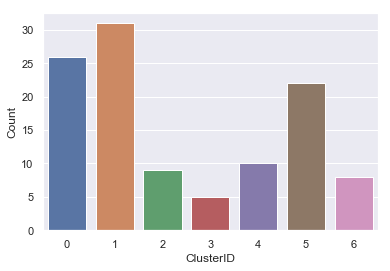

In [294]:
sns.set(font_scale = 1)
sns.barplot(x=km7_cluster_count.ClusterID, y=km7_cluster_count.Count)

In [295]:
km7_clusters_child_mort = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).child_mort.mean())
km7_clusters_exports = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).exports.mean())
km7_clusters_health = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).health.mean())
km7_clusters_imports = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).imports.mean())
km7_clusters_income = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).income.mean())
km7_clusters_inflation = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).inflation.mean())
km7_clusters_life_expec = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).life_expec.mean())
km7_clusters_total_fer = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).total_fer.mean())
km7_clusters_gdpp = pd.DataFrame(country_data_km7.groupby(["ClusterID"]).gdpp.mean())
km7_cluster_means = pd.concat([pd.Series([0,1,2,3,4,5,6]), km7_clusters_child_mort, km7_clusters_exports, km7_clusters_health, km7_clusters_imports, km7_clusters_income, km7_clusters_inflation, km7_clusters_life_expec, km7_clusters_total_fer, km7_clusters_gdpp], axis=1)
km7_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km7_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,89.988462,170.389962,47.026608,329.069115,1799.846154,5.913269,59.457692,5.110385,724.461538
1,1,32.293548,763.360597,134.651142,1123.349067,5448.709677,8.268419,70.016129,2.750968,2296.193548
2,2,88.455556,787.128667,66.118311,661.197778,3377.666667,19.188889,61.355556,5.243333,1556.888889
3,3,14.840000,2236.000000,890.410000,2318.140000,16260.000000,9.560000,77.000000,2.064000,10460.000000
4,4,32.640000,3102.713000,442.443000,2296.240000,16040.000000,13.417000,66.340000,2.597000,7335.000000
5,5,20.563636,1975.479545,337.658318,2483.045455,10809.545455,4.171364,73.459091,2.172727,5233.636364
6,6,11.075000,5287.413750,665.822625,5409.997500,17337.500000,2.989500,76.487500,1.853750,9738.750000


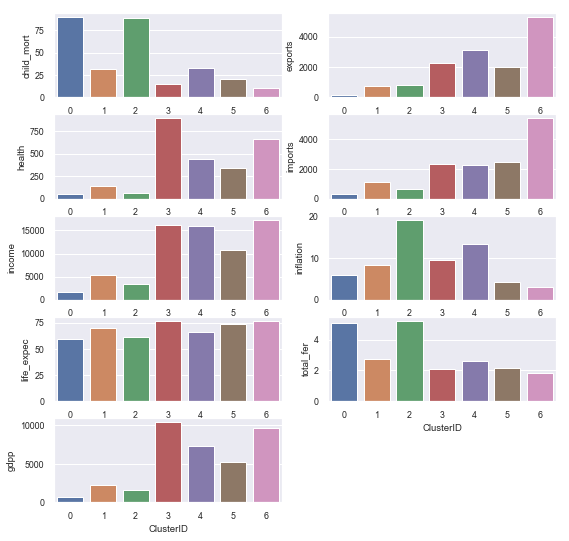

In [296]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km7_cluster_means.ClusterID, y=km7_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Again running k-means with k=7, this time with init as k-means++ and 10 initial centroid seeds(runs), instead of provinding the cluster centroids from hierarchical clustering as initial input, to check if it gives different better clusters.

In [297]:
# Kmeans with K=7
model_clus7_1 = KMeans(n_clusters = 7, init= 'k-means++',n_init = 10, max_iter=50)
model_clus7_1.fit(country_data_pca_5)

country_data_km7_1 = pd.concat([country_data, pd.Series(model_clus7_1.labels_)], axis=1)
country_data_km7_1.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']



In [298]:
km7_cluster_count_1 = pd.concat([pd.Series([0,1,2,3,4,5,6]),pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).size())], axis=1)
km7_cluster_count_1.columns = ['ClusterID','Count']
km7_cluster_count_1

,ClusterID,Count
0,0,18
1,1,15
2,2,19
3,3,9
4,4,23
5,5,11
6,6,16


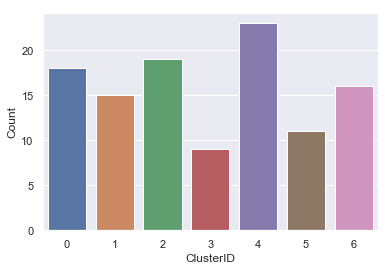

In [299]:
sns.set(font_scale = 1)
sns.barplot(x=km7_cluster_count_1.ClusterID, y=km7_cluster_count_1.Count)

In [300]:
km7_clusters_child_mort_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).child_mort.mean())
km7_clusters_exports_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).exports.mean())
km7_clusters_health_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).health.mean())
km7_clusters_imports_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).imports.mean())
km7_clusters_income_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).income.mean())
km7_clusters_inflation_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).inflation.mean())
km7_clusters_life_expec_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).life_expec.mean())
km7_clusters_total_fer_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).total_fer.mean())
km7_clusters_gdpp_1 = pd.DataFrame(country_data_km7_1.groupby(["ClusterID"]).gdpp.mean())
km7_cluster_means_1 = pd.concat([pd.Series([0,1,2,3,4,5,6]), km7_clusters_child_mort_1, km7_clusters_exports_1, km7_clusters_health_1, km7_clusters_imports_1, km7_clusters_income_1, km7_clusters_inflation_1, km7_clusters_life_expec_1, km7_clusters_total_fer_1, km7_clusters_gdpp_1], axis=1)
km7_cluster_means_1.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km7_cluster_means_1

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,44.294444,409.562573,67.404700,546.323727,4241.111111,11.059444,68.133333,2.884444,1381.333333
1,1,12.113333,4218.664667,670.315400,4406.338667,16540.000000,3.723067,76.080000,1.895333,9250.666667
2,2,17.684211,1536.075789,309.513000,2084.519474,10064.736842,6.321579,74.836842,2.052632,4704.210526
3,3,88.455556,787.128667,66.118311,661.197778,3377.666667,19.188889,61.355556,5.243333,1556.888889
4,4,91.891304,167.960487,49.392722,333.900478,1613.739130,5.306304,58.917391,5.272174,703.217391
5,5,30.600000,2710.430000,516.910909,2067.709091,16309.090909,14.207273,67.554545,2.510909,7868.181818
6,6,32.331250,1409.121875,191.100375,1867.525625,6358.125000,3.398188,69.068750,3.052500,3311.875000


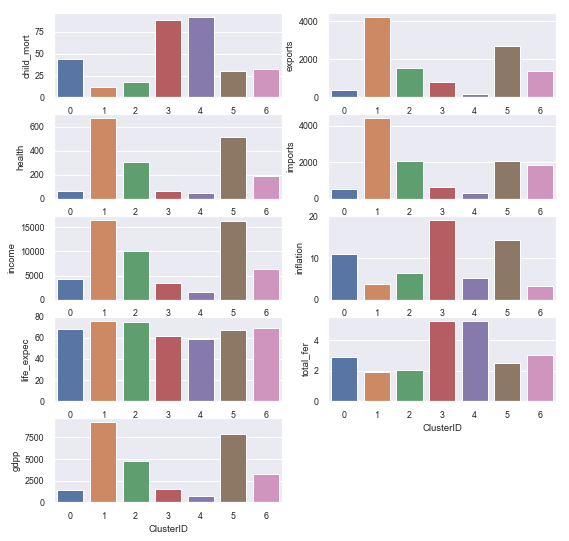

In [301]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km7_cluster_means_1.ClusterID, y=km7_cluster_means_1.gdpp)
 
#plt.tight_layout()    
plt.show()

#### K-Means with k=6

In [302]:
init = np.array(country_data_pca_5_hc6_init_cc,
                    np.float64)
init.shape
# Kmeans with K=6
model_clus6 = KMeans(n_clusters = 6, init= init, max_iter=50)
model_clus6.fit(country_data_pca_5)
country_data_km6 = pd.concat([country_data, pd.Series(model_clus6.labels_)], axis=1)
country_data_km6.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [303]:
km6_cluster_count = pd.concat([pd.Series([0,1,2,3,4,5]),pd.DataFrame(country_data_km6.groupby(["ClusterID"]).size())], axis=1)
km6_cluster_count.columns = ['ClusterID','Count']
km6_cluster_count

,ClusterID,Count
0,0,26
1,1,38
2,2,9
3,3,12
4,4,18
5,5,8


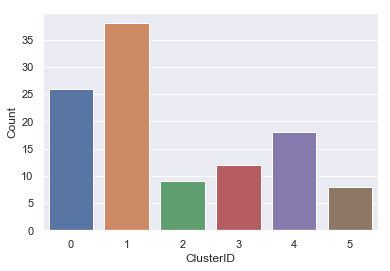

In [304]:
sns.set(font_scale = 1)
sns.barplot(x=km6_cluster_count.ClusterID, y=km6_cluster_count.Count)

In [305]:
km6_clusters_child_mort = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).child_mort.mean())
km6_clusters_exports = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).exports.mean())
km6_clusters_health = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).health.mean())
km6_clusters_imports = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).imports.mean())
km6_clusters_income = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).income.mean())
km6_clusters_inflation = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).inflation.mean())
km6_clusters_life_expec = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).life_expec.mean())
km6_clusters_total_fer = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).total_fer.mean())
km6_clusters_gdpp = pd.DataFrame(country_data_km6.groupby(["ClusterID"]).gdpp.mean())
km6_cluster_means = pd.concat([pd.Series([0,1,2,3,4,5]), km6_clusters_child_mort, km6_clusters_exports, km6_clusters_health, km6_clusters_imports, km6_clusters_income, km6_clusters_inflation, km6_clusters_life_expec, km6_clusters_total_fer, km6_clusters_gdpp], axis=1)
km6_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km6_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,89.988462,170.389962,47.026608,329.069115,1799.846154,5.913269,59.457692,5.110385,724.461538
1,1,30.589474,912.740487,160.863405,1244.376608,6191.315789,8.302921,70.597368,2.766579,2682.421053
2,2,88.455556,787.128667,66.118311,661.197778,3377.666667,19.188889,61.355556,5.243333,1556.888889
3,3,21.458333,2965.287500,610.012333,2313.860833,16975.000000,12.508333,72.483333,2.188333,8960.000000
4,4,24.122222,2170.237222,391.455056,2719.515556,11636.111111,3.580556,71.250000,2.110000,5695.555556
5,5,11.075000,5287.413750,665.822625,5409.997500,17337.500000,2.989500,76.487500,1.853750,9738.750000


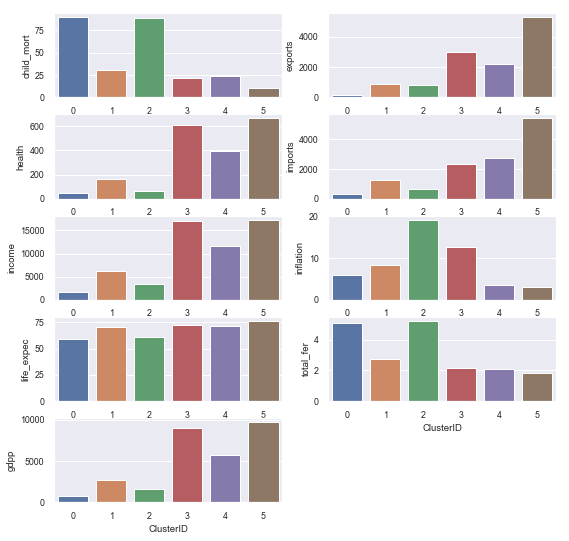

In [306]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km6_cluster_means.ClusterID, y=km6_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Again running k-means with k=6, this time with init as k-means++ and 10 initial centroid seeds to check if it gives different better clusters.

In [307]:
# Kmeans with K=6
model_clus6_1 = KMeans(n_clusters = 6, init= 'k-means++',n_init = 10, max_iter=50)
model_clus6_1.fit(country_data_pca_5)

country_data_km6_1 = pd.concat([country_data, pd.Series(model_clus6_1.labels_)], axis=1)
country_data_km6_1.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']



In [308]:
km6_cluster_count_1 = pd.concat([pd.Series([0,1,2,3,4,5]),pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).size())], axis=1)
km6_cluster_count_1.columns = ['ClusterID','Count']
km6_cluster_count_1

,ClusterID,Count
0,0,8
1,1,15
2,2,20
3,3,26
4,4,12
5,5,30


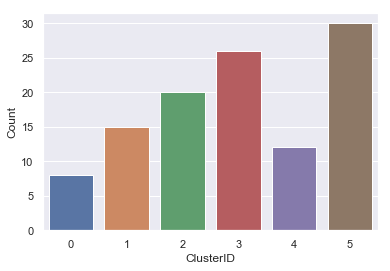

In [309]:
sns.set(font_scale = 1)
sns.barplot(x=km6_cluster_count_1.ClusterID, y=km6_cluster_count_1.Count)

In [310]:
km6_clusters_child_mort_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).child_mort.mean())
km6_clusters_exports_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).exports.mean())
km6_clusters_health_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).health.mean())
km6_clusters_imports_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).imports.mean())
km6_clusters_income_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).income.mean())
km6_clusters_inflation_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).inflation.mean())
km6_clusters_life_expec_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).life_expec.mean())
km6_clusters_total_fer_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).total_fer.mean())
km6_clusters_gdpp_1 = pd.DataFrame(country_data_km6_1.groupby(["ClusterID"]).gdpp.mean())
km6_cluster_means_1 = pd.concat([pd.Series([0,1,2,3,4,5]), km6_clusters_child_mort_1, km6_clusters_exports_1, km6_clusters_health_1, km6_clusters_imports_1, km6_clusters_income_1, km6_clusters_inflation_1, km6_clusters_life_expec_1, km6_clusters_total_fer_1, km6_clusters_gdpp_1], axis=1)
km6_cluster_means_1.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km6_cluster_means_1

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,89.125000,817.994750,63.633850,687.455000,3389.875000,19.837500,62.525000,5.223750,1569.000000
1,1,12.113333,4218.664667,670.315400,4406.338667,16540.000000,3.723067,76.080000,1.895333,9250.666667
2,2,39.460000,549.526926,85.880820,721.654055,4616.000000,9.727000,68.740000,2.794000,1672.600000
3,3,90.150000,175.645346,48.374146,324.804500,1772.923077,6.097885,59.003846,5.196923,736.769231
4,4,30.325000,2627.280833,489.333500,2012.103333,16025.000000,14.365000,68.300000,2.542500,7584.166667
5,5,22.893333,1541.228333,273.744600,2105.750667,8612.666667,4.680367,72.503333,2.417667,4260.000000


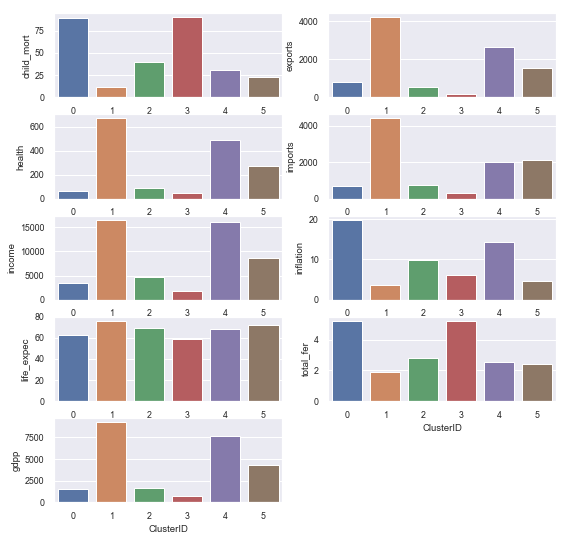

In [311]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km6_cluster_means_1.ClusterID, y=km6_cluster_means_1.gdpp)
 
#plt.tight_layout()    
plt.show()

#### K-Means with k=5

In [312]:
init = np.array(country_data_pca_5_hc5_init_cc,
                    np.float64)
init.shape
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, init= init, max_iter=50)
model_clus5.fit(country_data_pca_5)
country_data_km5 = pd.concat([country_data, pd.Series(model_clus5.labels_)], axis=1)
country_data_km5.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [313]:
km5_cluster_count = pd.concat([pd.Series([0,1,2,3,4]),pd.DataFrame(country_data_km5.groupby(["ClusterID"]).size())], axis=1)
km5_cluster_count.columns = ['ClusterID','Count']
km5_cluster_count

,ClusterID,Count
0,0,35
1,1,38
2,2,12
3,3,18
4,4,8


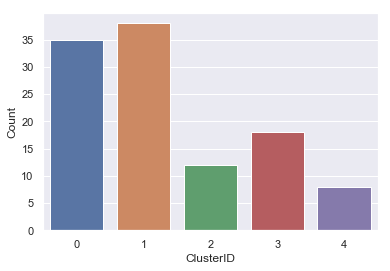

In [314]:
sns.set(font_scale = 1)
sns.barplot(x=km5_cluster_count.ClusterID, y=km5_cluster_count.Count)

In [315]:
km5_clusters_child_mort = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).child_mort.mean())
km5_clusters_exports = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).exports.mean())
km5_clusters_health = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).health.mean())
km5_clusters_imports = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).imports.mean())
km5_clusters_income = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).income.mean())
km5_clusters_inflation = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).inflation.mean())
km5_clusters_life_expec = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).life_expec.mean())
km5_clusters_total_fer = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).total_fer.mean())
km5_clusters_gdpp = pd.DataFrame(country_data_km5.groupby(["ClusterID"]).gdpp.mean())
km5_cluster_means = pd.concat([pd.Series([0,1,2,3,4]), km5_clusters_child_mort, km5_clusters_exports, km5_clusters_health, km5_clusters_imports, km5_clusters_income, km5_clusters_inflation, km5_clusters_life_expec, km5_clusters_total_fer, km5_clusters_gdpp], axis=1)
km5_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km5_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,89.594286,328.979914,51.935903,414.473629,2205.571429,9.327000,59.945714,5.144571,938.514286
1,1,30.589474,912.740487,160.863405,1244.376608,6191.315789,8.302921,70.597368,2.766579,2682.421053
2,2,21.458333,2965.287500,610.012333,2313.860833,16975.000000,12.508333,72.483333,2.188333,8960.000000
3,3,24.122222,2170.237222,391.455056,2719.515556,11636.111111,3.580556,71.250000,2.110000,5695.555556
4,4,11.075000,5287.413750,665.822625,5409.997500,17337.500000,2.989500,76.487500,1.853750,9738.750000


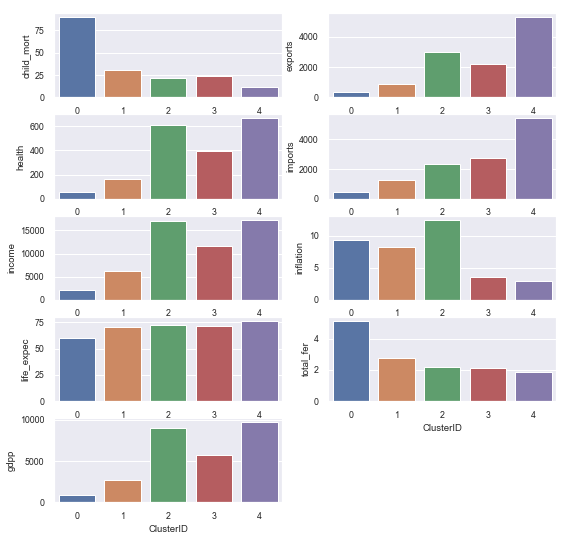

In [316]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km5_cluster_means.ClusterID, y=km5_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Again running k-means with k=5, this time with init as k-means++ and 10 initial centroid seeds to check if it gives different better clusters.

In [317]:
# Kmeans with K=5
model_clus5_1 = KMeans(n_clusters = 5, init= 'k-means++',n_init = 10, max_iter=50)
model_clus5_1.fit(country_data_pca_5)

country_data_km5_1 = pd.concat([country_data, pd.Series(model_clus5_1.labels_)], axis=1)
country_data_km5_1.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']



In [318]:
km5_cluster_count_1 = pd.concat([pd.Series([0,1,2,3,4]),pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).size())], axis=1)
km5_cluster_count_1.columns = ['ClusterID','Count']
km5_cluster_count_1

,ClusterID,Count
0,0,27
1,1,12
2,2,15
3,3,22
4,4,35


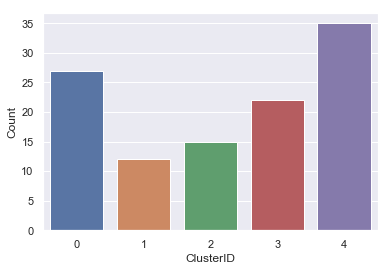

In [319]:
sns.set(font_scale = 1)
sns.barplot(x=km5_cluster_count_1.ClusterID, y=km5_cluster_count_1.Count)

In [320]:
km5_clusters_child_mort_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).child_mort.mean())
km5_clusters_exports_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).exports.mean())
km5_clusters_health_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).health.mean())
km5_clusters_imports_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).imports.mean())
km5_clusters_income_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).income.mean())
km5_clusters_inflation_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).inflation.mean())
km5_clusters_life_expec_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).life_expec.mean())
km5_clusters_total_fer_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).total_fer.mean())
km5_clusters_gdpp_1 = pd.DataFrame(country_data_km5_1.groupby(["ClusterID"]).gdpp.mean())
km5_cluster_means_1 = pd.concat([pd.Series([0,1,2,3,4]), km5_clusters_child_mort_1, km5_clusters_exports_1, km5_clusters_health_1, km5_clusters_imports_1, km5_clusters_income_1, km5_clusters_inflation_1, km5_clusters_life_expec_1, km5_clusters_total_fer_1, km5_clusters_gdpp_1], axis=1)
km5_cluster_means_1.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km5_cluster_means_1

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,94.096296,256.892563,51.148052,373.734111,1781.296296,7.235000,58.618519,5.359259,820.222222
1,1,30.325000,2627.280833,489.333500,2012.103333,16025.000000,14.365000,68.300000,2.542500,7584.166667
2,2,12.113333,4218.664667,670.315400,4406.338667,16540.000000,3.723067,76.080000,1.895333,9250.666667
3,3,52.231818,488.378015,62.394300,549.724868,4175.000000,13.062273,67.331818,3.381818,1421.545455
4,4,24.091429,1447.363143,255.516600,1981.868286,8113.428571,4.842314,72.005714,2.463429,3986.857143


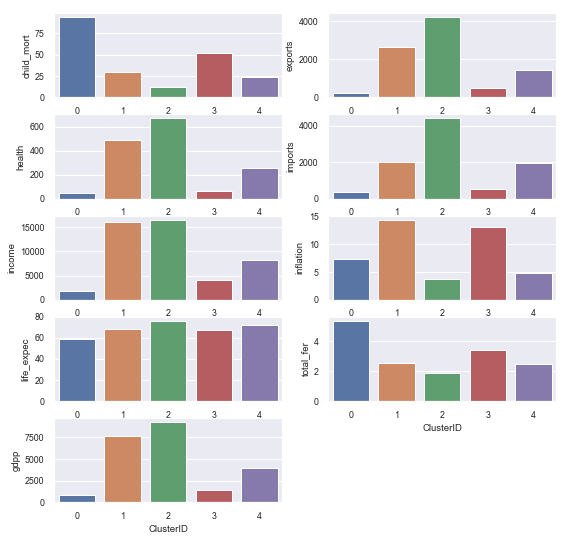

In [321]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km5_cluster_means_1.ClusterID, y=km5_cluster_means_1.gdpp)
 
#plt.tight_layout()    
plt.show()

#### K-Means with k=4

In [322]:
init = np.array(country_data_pca_5_hc4_init_cc,
                    np.float64)
init.shape
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, init= init, max_iter=50)
model_clus4.fit(country_data_pca_5)
country_data_km4 = pd.concat([country_data, pd.Series(model_clus4.labels_)], axis=1)
country_data_km4.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [323]:
km4_cluster_count = pd.concat([pd.Series([0,1,2,3]),pd.DataFrame(country_data_km4.groupby(["ClusterID"]).size())], axis=1)
km4_cluster_count.columns = ['ClusterID','Count']
km4_cluster_count

,ClusterID,Count
0,0,36
1,1,43
2,2,24
3,3,8


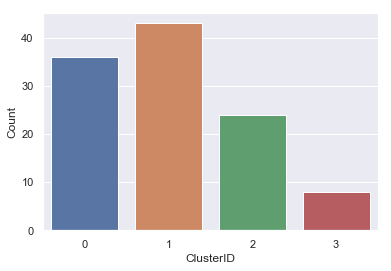

In [324]:
sns.set(font_scale = 1)
sns.barplot(x=km4_cluster_count.ClusterID, y=km4_cluster_count.Count)

In [325]:
km4_clusters_child_mort = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).child_mort.mean())
km4_clusters_exports = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).exports.mean())
km4_clusters_health = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).health.mean())
km4_clusters_imports = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).imports.mean())
km4_clusters_income = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).income.mean())
km4_clusters_inflation = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).inflation.mean())
km4_clusters_life_expec = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).life_expec.mean())
km4_clusters_total_fer = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).total_fer.mean())
km4_clusters_gdpp = pd.DataFrame(country_data_km4.groupby(["ClusterID"]).gdpp.mean())
km4_cluster_means = pd.concat([pd.Series([0,1,2,3]), km4_clusters_child_mort, km4_clusters_exports, km4_clusters_health, km4_clusters_imports, km4_clusters_income, km4_clusters_inflation, km4_clusters_life_expec, km4_clusters_total_fer, km4_clusters_gdpp], axis=1)
km4_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km4_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,87.886111,337.507417,53.556989,432.057139,2193.750000,9.257083,59.994444,5.119444,948.277778
1,1,31.151163,1091.061361,175.698963,1394.243514,6772.093023,7.661884,70.853488,2.707442,2983.534884
2,2,20.270833,2574.177083,533.908250,2625.165417,14810.000000,8.074583,71.941667,2.029583,7599.583333
3,3,11.075000,5287.413750,665.822625,5409.997500,17337.500000,2.989500,76.487500,1.853750,9738.750000


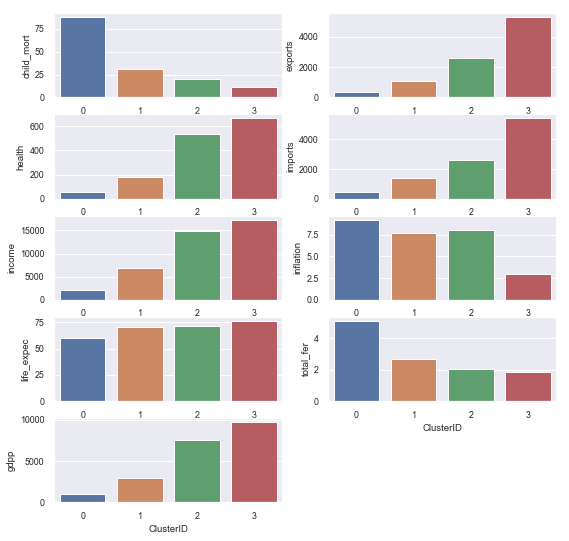

In [326]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km4_cluster_means.ClusterID, y=km4_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Again running k-means with k=4, this time with init as k-means++ and 10 initial centroid seeds to check if it gives different better clusters.

In [327]:
# Kmeans with K=4
model_clus4_1 = KMeans(n_clusters = 4, init= 'k-means++',n_init = 10, max_iter=50)
model_clus4_1.fit(country_data_pca_5)

country_data_km4_1 = pd.concat([country_data, pd.Series(model_clus4_1.labels_)], axis=1)
country_data_km4_1.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']



In [328]:
km4_cluster_count_1 = pd.concat([pd.Series([0,1,2,3]),pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).size())], axis=1)
km4_cluster_count_1.columns = ['ClusterID','Count']
km4_cluster_count_1

,ClusterID,Count
0,0,38
1,1,23
2,2,21
3,3,29


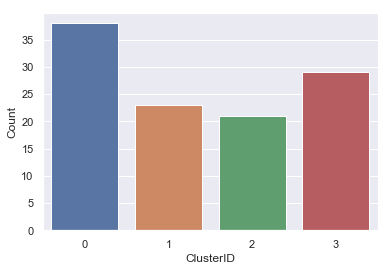

In [329]:
sns.set(font_scale = 1)
sns.barplot(x=km4_cluster_count_1.ClusterID, y=km4_cluster_count_1.Count)

In [330]:
km4_clusters_child_mort_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).child_mort.mean())
km4_clusters_exports_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).exports.mean())
km4_clusters_health_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).health.mean())
km4_clusters_imports_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).imports.mean())
km4_clusters_income_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).income.mean())
km4_clusters_inflation_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).inflation.mean())
km4_clusters_life_expec_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).life_expec.mean())
km4_clusters_total_fer_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).total_fer.mean())
km4_clusters_gdpp_1 = pd.DataFrame(country_data_km4_1.groupby(["ClusterID"]).gdpp.mean())
km4_cluster_means_1 = pd.concat([pd.Series([0,1,2,3]), km4_clusters_child_mort_1, km4_clusters_exports_1, km4_clusters_health_1, km4_clusters_imports_1, km4_clusters_income_1, km4_clusters_inflation_1, km4_clusters_life_expec_1, km4_clusters_total_fer_1, km4_clusters_gdpp_1], axis=1)
km4_cluster_means_1.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km4_cluster_means_1

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,25.950000,1594.875526,282.853000,2011.438684,9106.842105,5.663974,71.394737,2.469211,4374.736842
1,1,47.295652,597.131675,86.218539,668.413526,4711.304348,12.903913,67.834783,3.257826,1652.695652
2,2,15.080952,3890.789524,641.683190,3789.400476,16957.142857,7.169333,74.385714,2.016190,9276.666667
3,3,92.686207,244.813345,48.851676,358.789207,1855.000000,7.511897,58.955172,5.281379,816.137931


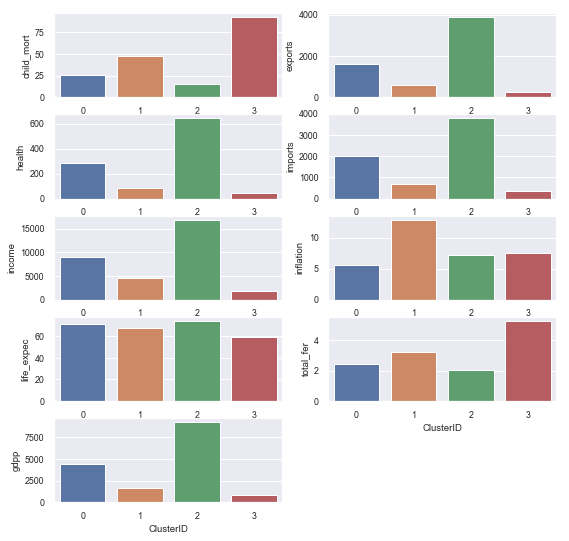

In [331]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km4_cluster_means_1.ClusterID, y=km4_cluster_means_1.gdpp)
     
plt.show()

#### K-Means with k=3

In [332]:
init = np.array(country_data_pca_5_hc3_init_cc,
                    np.float64)
init.shape
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3, init= init, max_iter=50)
model_clus3.fit(country_data_pca_5)
country_data_km3 = pd.concat([country_data, pd.Series(model_clus3.labels_)], axis=1)
country_data_km3.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [333]:
km3_cluster_count = pd.concat([pd.Series([0,1,2]),pd.DataFrame(country_data_km3.groupby(["ClusterID"]).size())], axis=1)
km3_cluster_count.columns = ['ClusterID','Count']
km3_cluster_count

,ClusterID,Count
0,0,37
1,1,47
2,2,27


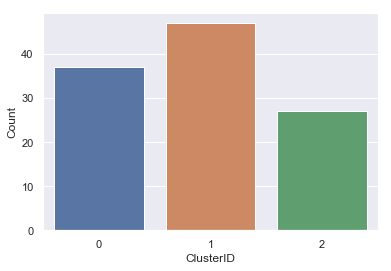

In [334]:
sns.set(font_scale = 1)
sns.barplot(x=km3_cluster_count.ClusterID, y=km3_cluster_count.Count)

In [335]:
km3_clusters_child_mort = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).child_mort.mean())
km3_clusters_exports = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).exports.mean())
km3_clusters_health = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).health.mean())
km3_clusters_imports = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).imports.mean())
km3_clusters_income = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).income.mean())
km3_clusters_inflation = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).inflation.mean())
km3_clusters_life_expec = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).life_expec.mean())
km3_clusters_total_fer = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).total_fer.mean())
km3_clusters_gdpp = pd.DataFrame(country_data_km3.groupby(["ClusterID"]).gdpp.mean())
km3_cluster_means = pd.concat([pd.Series([0,1,2]), km3_clusters_child_mort, km3_clusters_exports, km3_clusters_health, km3_clusters_imports, km3_clusters_income, km3_clusters_inflation, km3_clusters_life_expec, km3_clusters_total_fer, km3_clusters_gdpp], axis=1)
km3_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km3_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,86.927027,331.357541,53.302270,432.068243,2191.486486,9.344730,60.254054,5.075946,942.594595
1,1,29.000000,1154.142692,201.341596,1499.134534,7413.404255,7.331936,71.285106,2.585745,3313.063830
2,2,18.488889,3579.278889,599.564704,3531.282593,16103.703704,7.039481,72.785185,2.034074,8597.777778


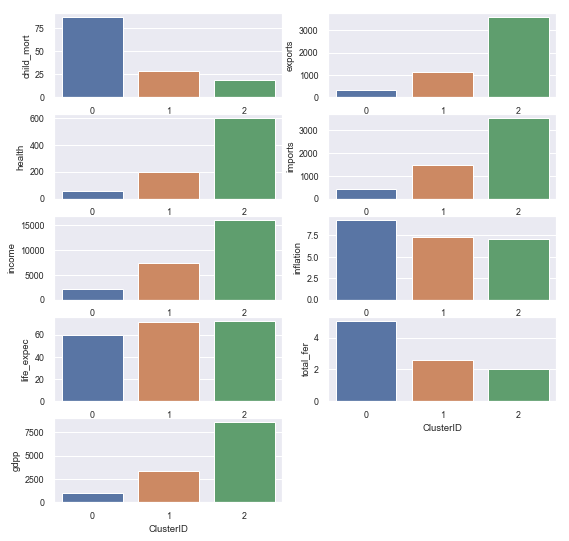

In [336]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km3_cluster_means.ClusterID, y=km3_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Again running k-means with k=3, this time with init as k-means++ and 10 initial centroid seeds to check if it gives different better clusters.

In [337]:
# Kmeans with K=3
model_clus3_1 = KMeans(n_clusters = 3, init= 'k-means++',n_init = 10, max_iter=50)
model_clus3_1.fit(country_data_pca_5)

country_data_km3_1 = pd.concat([country_data, pd.Series(model_clus3_1.labels_)], axis=1)
country_data_km3_1.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']



In [338]:
km3_cluster_count_1 = pd.concat([pd.Series([0,1,2]),pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).size())], axis=1)
km3_cluster_count_1.columns = ['ClusterID','Count']
km3_cluster_count_1

,ClusterID,Count
0,0,39
1,1,26
2,2,46


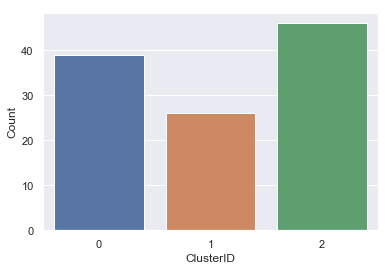

In [339]:
sns.set(font_scale = 1)
sns.barplot(x=km3_cluster_count_1.ClusterID, y=km3_cluster_count_1.Count)

In [340]:
km3_clusters_child_mort_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).child_mort.mean())
km3_clusters_exports_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).exports.mean())
km3_clusters_health_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).health.mean())
km3_clusters_imports_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).imports.mean())
km3_clusters_income_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).income.mean())
km3_clusters_inflation_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).inflation.mean())
km3_clusters_life_expec_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).life_expec.mean())
km3_clusters_total_fer_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).total_fer.mean())
km3_clusters_gdpp_1 = pd.DataFrame(country_data_km3_1.groupby(["ClusterID"]).gdpp.mean())
km3_cluster_means_1 = pd.concat([pd.Series([0,1,2]), km3_clusters_child_mort_1, km3_clusters_exports_1, km3_clusters_health_1, km3_clusters_imports_1, km3_clusters_income_1, km3_clusters_inflation_1, km3_clusters_life_expec_1, km3_clusters_total_fer_1, km3_clusters_gdpp_1], axis=1)
km3_cluster_means_1.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km3_cluster_means_1

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,85.325641,315.846654,51.864810,415.452925,2225.512821,9.433205,60.628205,4.944359,934.769231
1,1,17.692308,3594.977308,609.417500,3620.605769,16107.692308,6.779462,72.926923,2.038462,8703.846154
2,2,28.060870,1246.913826,212.084857,1553.305739,7798.260870,7.310022,71.400000,2.574565,3477.695652


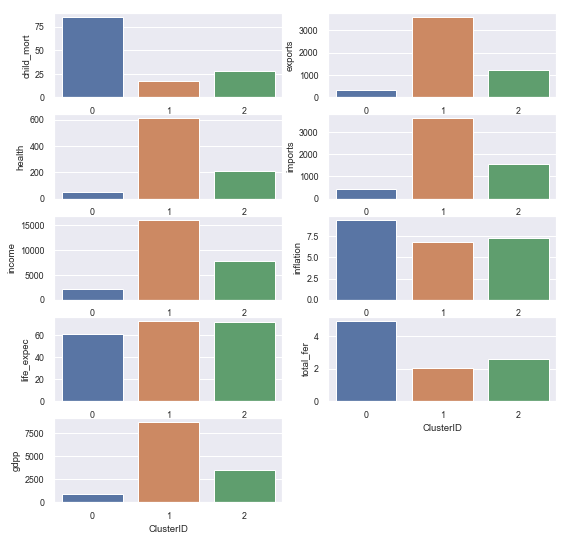

In [341]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km3_cluster_means_1.ClusterID, y=km3_cluster_means_1.gdpp)
 
#plt.tight_layout()    
plt.show()

#### K-Means with k=2

In [342]:
init = np.array(country_data_pca_5_hc2_init_cc,
                    np.float64)
init.shape
# Kmeans with K=2
model_clus2 = KMeans(n_clusters = 2, init= init, max_iter=50)
model_clus2.fit(country_data_pca_5)
country_data_km2 = pd.concat([country_data, pd.Series(model_clus2.labels_)], axis=1)
country_data_km2.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [343]:
km2_cluster_count = pd.concat([pd.Series([0,1]),pd.DataFrame(country_data_km2.groupby(["ClusterID"]).size())], axis=1)
km2_cluster_count.columns = ['ClusterID','Count']
km2_cluster_count

,ClusterID,Count
0,0,59
1,1,52


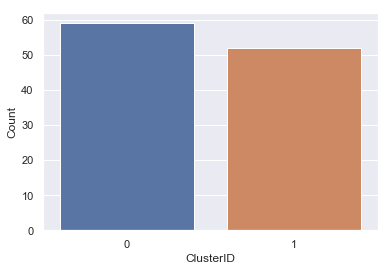

In [344]:
sns.set(font_scale = 1)
sns.barplot(x=km2_cluster_count.ClusterID, y=km2_cluster_count.Count)

In [345]:
km2_clusters_child_mort = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).child_mort.mean())
km2_clusters_exports = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).exports.mean())
km2_clusters_health = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).health.mean())
km2_clusters_imports = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).imports.mean())
km2_clusters_income = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).income.mean())
km2_clusters_inflation = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).inflation.mean())
km2_clusters_life_expec = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).life_expec.mean())
km2_clusters_total_fer = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).total_fer.mean())
km2_clusters_gdpp = pd.DataFrame(country_data_km2.groupby(["ClusterID"]).gdpp.mean())
km2_cluster_means = pd.concat([pd.Series([0,1]), km2_clusters_child_mort, km2_clusters_exports, km2_clusters_health, km2_clusters_imports, km2_clusters_income, km2_clusters_inflation, km2_clusters_life_expec, km2_clusters_total_fer, km2_clusters_gdpp], axis=1)
km2_cluster_means.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km2_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,67.686441,452.454161,78.041475,648.955561,3246.355932,8.943915,63.642373,4.232712,1371.016949
1,1,20.865385,2624.051346,442.673827,2759.655769,12938.076923,6.783288,72.886538,2.202500,6573.846154


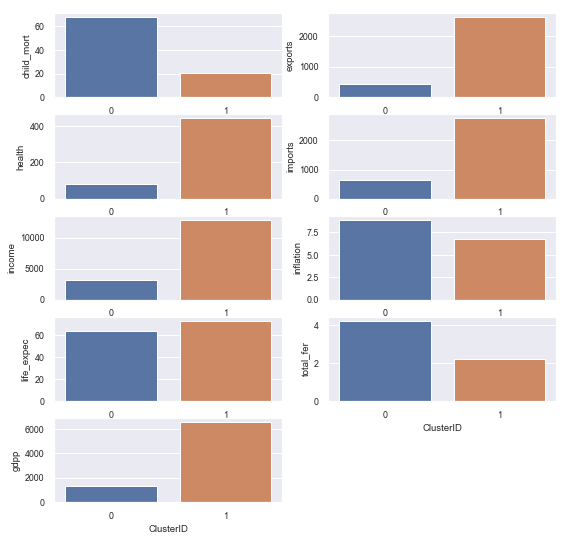

In [346]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km2_cluster_means.ClusterID, y=km2_cluster_means.gdpp)
 
#plt.tight_layout()    
plt.show()

#### Again running k-means with k=2, this time with init as k-means++ and 10 initial centroid seeds to check if it gives different better clusters.

In [347]:
# Kmeans with K=2
model_clus2_1 = KMeans(n_clusters = 2, init= 'k-means++',n_init = 10, max_iter=50)
model_clus2_1.fit(country_data_pca_5)

country_data_km2_1 = pd.concat([country_data, pd.Series(model_clus2_1.labels_)], axis=1)
country_data_km2_1.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']



In [348]:
km2_cluster_count_1 = pd.concat([pd.Series([0,1]),pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).size())], axis=1)
km2_cluster_count_1.columns = ['ClusterID','Count']
km2_cluster_count_1

,ClusterID,Count
0,0,52
1,1,59


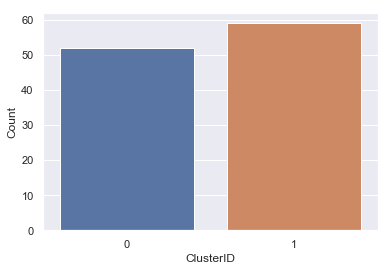

In [349]:
sns.set(font_scale = 1)
sns.barplot(x=km2_cluster_count_1.ClusterID, y=km2_cluster_count_1.Count)

In [350]:
km2_clusters_child_mort_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).child_mort.mean())
km2_clusters_exports_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).exports.mean())
km2_clusters_health_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).health.mean())
km2_clusters_imports_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).imports.mean())
km2_clusters_income_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).income.mean())
km2_clusters_inflation_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).inflation.mean())
km2_clusters_life_expec_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).life_expec.mean())
km2_clusters_total_fer_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).total_fer.mean())
km2_clusters_gdpp_1 = pd.DataFrame(country_data_km2_1.groupby(["ClusterID"]).gdpp.mean())
km2_cluster_means_1 = pd.concat([pd.Series([0,1]), km2_clusters_child_mort_1, km2_clusters_exports_1, km2_clusters_health_1, km2_clusters_imports_1, km2_clusters_income_1, km2_clusters_inflation_1, km2_clusters_life_expec_1, km2_clusters_total_fer_1, km2_clusters_gdpp_1], axis=1)
km2_cluster_means_1.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
km2_cluster_means_1

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,20.865385,2624.051346,442.673827,2759.655769,12938.076923,6.783288,72.886538,2.202500,6573.846154
1,1,67.686441,452.454161,78.041475,648.955561,3246.355932,8.943915,63.642373,4.232712,1371.016949


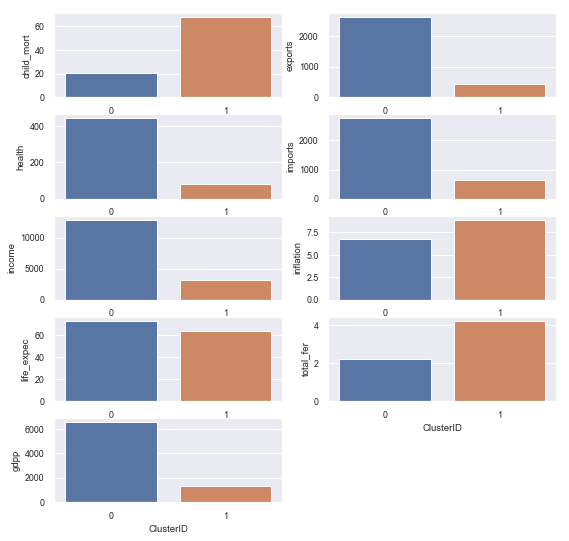

In [351]:
plt.figure(figsize=(9, 9))
sns.set(font_scale = 0.8)
plt.subplot(5, 2, 1)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.child_mort)
plt.subplot(5, 2, 2)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.exports)
plt.subplot(5, 2, 3)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.health)
plt.subplot(5, 2, 4)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.imports)
plt.subplot(5, 2, 5)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.income)
plt.subplot(5, 2, 6)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.inflation)
plt.subplot(5, 2, 7)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.life_expec)
plt.subplot(5, 2, 8)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.total_fer)
plt.subplot(5, 2, 9)
sns.barplot(x=km2_cluster_means_1.ClusterID, y=km2_cluster_means_1.gdpp)
 
#plt.tight_layout()    
plt.show()

#### After going through the clusters formed using different values of k and different methods, the ideal value of k would be  3 computed using k-means with initial cluster centroids from hirarchical clustering, even though the Silhouette Score gives 2 as the optimal value, as it gives the most meaningful clustering of countries elaborated below:

#### The Clusters formed are:

#### Cluster 0 - Countries having higher values for some or most of these variables (child_mort, inflation, total_fer)  and lower values  for some or most of these variables(exports, health, imports, income, life_expec, gdpp)

#### Cluster 1 - Countries having moderately high(lower than cluster 0 countries but higher than cluster 2 countries) values for some or most of these variables (child_mort, inflation, total_fer) and moderately lower values(higher than cluster 0 countries but lower than cluster 2 countries)  for some or most of these variables(exports, health, imports, income, life_expec, gdpp). 

#### Cluster 2 - Countries having lowest values for some or most of these variables (child_mort, inflation, total_fer)            and highest values for some or most of these variables(exports, health, imports, income, life_expec, gdpp)

#### Cluster 0 countries are mostly poorer/poorly managed countries/developing with higher child mortality, higher inflation, more no of children per female, with lower exports and imports, poorer health conditions, lower life expectacy and lowest gdp.
#### Cluster 0 countries are the ones which should be picked first to provide financial aid.

#### Cluster 1 countries are average developed countries with moderate child mortality, moderate inflation, around 2 children per female, with moderate exports and imports, moderate health conditions, moderate life expectacy and moderate gdp. 
#### Cluster 1 countries should be picked up based on variables where they are lagging but first priority to be given to cluster 0 countries.

#### Cluster2 countries are the developed countries with very low child mortalty, lowest inflation rates, least no of children per female, highest exports and imports, best healthcare as a result high life expectancy and highest gdp.
#### Cluster2 countries are the star countries which are rich and self sufficient and do not need any financial aid.


#### We can also try to visualize with scatter plot some combinations of 2, of the 5 principle components and the clusters formed in different hues to see how the clusters were formed.

In [358]:
country_data_km3_pc5 = pd.concat([pd.DataFrame(country_data_pca_5), pd.Series(model_clus3.labels_)], axis=1)
country_data_km3_pc5.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'ClusterID']

In [361]:
country_data_km3_pc5.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-3.257517,0.687168,-0.612296,0.166738,0.022253,0
1,1.273893,-1.322901,0.532452,0.016734,-0.045346,1
2,0.835521,0.460520,1.703776,-0.324072,-0.574503,1
3,-2.153031,3.177169,0.141154,-0.613555,-0.704850,0
4,3.067375,1.990389,1.946881,1.676685,-0.230188,2


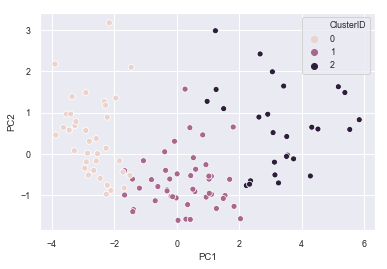

In [362]:
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=country_data_km3_pc5)

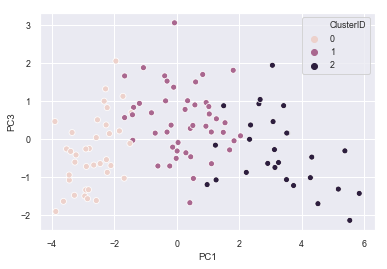

In [363]:
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=country_data_km3_pc5)

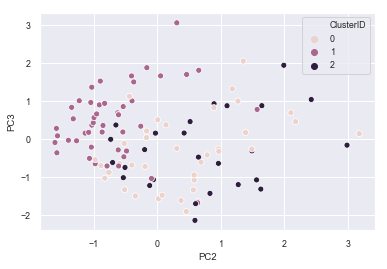

In [364]:
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full',data=country_data_km3_pc5)

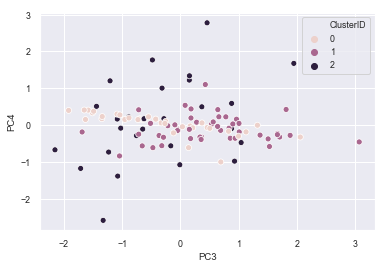

In [365]:
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full',data=country_data_km3_pc5)

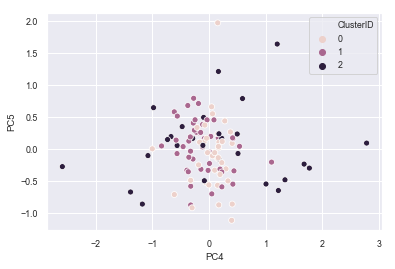

In [367]:
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC4',y='PC5',hue='ClusterID',legend='full',data=country_data_km3_pc5)

#### Now that we have 3 well defined clusters, we can assign the outlier values to the clusters based on their distance from the cluster centroids being minimum.

In [379]:
outlier_data_all.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446
1,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897
2,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662
3,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399
4,Austria,4.3,24059.700,5159.0000,22418.200,43200,0.873,80.5,1.44,46900


#### The numeric variables of the below dataframe which contains the mean values of k=3 kmeans clusters will provide us the cluster centroids

In [380]:
km3_cluster_means

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,86.927027,331.357541,53.302270,432.068243,2191.486486,9.344730,60.254054,5.075946,942.594595
1,1,29.000000,1154.142692,201.341596,1499.134534,7413.404255,7.331936,71.285106,2.585745,3313.063830
2,2,18.488889,3579.278889,599.564704,3531.282593,16103.703704,7.039481,72.785185,2.034074,8597.777778


#### Calculating the mean distance of each data point in the outlier data from each of the cluster centroids and storing them in 3 seperate columns.
#### Then data points are assigned to clusters with which they share minimum distance.

In [381]:
from scipy.spatial import distance
cluster_0_centroid = np.array(km3_cluster_means.loc[km3_cluster_means.ClusterID==0,['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])
cluster_1_centroid = np.array(km3_cluster_means.loc[km3_cluster_means.ClusterID==1,['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])
cluster_2_centroid = np.array(km3_cluster_means.loc[km3_cluster_means.ClusterID==2,['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

outlier_data_all['dist_cluster_0_centroid'] = 0
outlier_data_all['dist_cluster_1_centroid'] = 0
outlier_data_all['dist_cluster_2_centroid'] = 0
outlier_data_all['ClusterID'] = 0

def assign_cluster(clus_0_d,clus_1_d,clus_2_d):
    if (clus_0_d < clus_1_d) and (clus_0_d < clus_2_d):
        return 0
    elif (clus_1_d < clus_0_d) and (clus_1_d < clus_2_d):
        return 1
    elif (clus_2_d < clus_0_d) and (clus_2_d < clus_1_d):
        return 2

for j  in outlier_data_all.index:
    dp = np.array(outlier_data_all.loc[outlier_data_all.index==j, ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])
    dist_clus_0 = distance.euclidean(cluster_0_centroid, dp)
    dist_clus_1 = distance.euclidean(cluster_1_centroid, dp)
    dist_clus_2 = distance.euclidean(cluster_2_centroid, dp)
    outlier_data_all.loc[outlier_data_all.index==j,'dist_cluster_0_centroid'] = dist_clus_0
    outlier_data_all.loc[outlier_data_all.index==j,'dist_cluster_1_centroid'] = dist_clus_1
    outlier_data_all.loc[outlier_data_all.index==j,'dist_cluster_2_centroid'] = dist_clus_2
    outlier_data_all.loc[outlier_data_all.index==j,'ClusterID'] = assign_cluster(dist_clus_0,dist_clus_1,dist_clus_2)
    

In [382]:
outlier_data_all

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_cluster_0_centroid,dist_cluster_1_centroid,dist_cluster_2_centroid,ClusterID
0,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446,1458.501410,7346.428019,17955.829220,0
1,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897,276.356306,6152.608383,16761.547087,0
2,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,790.797416,6656.533953,17271.765125,0
3,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399,1183.747557,7065.777629,17689.464859,0
4,Austria,4.3,24059.700,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,69758.734142,64555.033964,54756.018369,2
5,Belgium,4.5,33921.600,4750.8000,33166.800,41100,1.880,80.0,1.86,44400,74995.728513,70143.913702,61014.484476,2
6,Brunei,10.5,23792.200,1002.5200,9884.000,80600,16.700,77.1,1.84,35300,89269.164016,83443.824463,72951.097693,2
7,Denmark,4.1,29290.000,6612.0000,25288.000,44000,3.220,79.5,1.87,58000,80640.829763,75682.718031,66252.007403,2
8,Iceland,2.6,22374.600,3938.6000,18142.700,38800,5.470,82.0,2.20,41900,61906.110201,56704.091836,46926.186521,2
9,Ireland,4.2,50161.000,4475.5300,42125.500,45700,-3.220,80.4,2.05,48700,91731.453457,87156.643574,78476.256377,2


#### Merging the outlier data with the calculated clusterids to the main K means k=3 dataframe

In [383]:
outlier_data_all1 = outlier_data_all[['country','child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']]
#outlier_data_all1['net_exports'] = outlier_data_all1.exports - outlier_data_all1.imports
country_data_km3_with_outliers_assigned = pd.concat([country_data_km3,outlier_data_all1], axis = 0)
country_data_km3_with_outliers_assigned.reset_index(inplace=True)
country_data_km3_with_outliers_assigned.drop('index',axis=1,inplace=True)


In [384]:
country_data_km3_with_outliers_assigned.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,2


#### Going Through the final Results

#### Cluster 0 Countries - The countries which are poor/low gdp/lower on health/high child mortality/higher inflation/ higher total fertility. These countries would need more immediate financial aid/better healthcare.

In [385]:
from IPython.core.display import HTML
display(HTML(country_data_km3_with_outliers_assigned.loc[country_data_km3_with_outliers_assigned.ClusterID==0].to_html()))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
10,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0
17,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0
18,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
20,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0
25,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,0
26,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
27,"Congo, Rep.",63.9,2331.7400,67.4040,1498.780,5190,20.700,60.4,4.95,2740,0
29,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,0


#### Cluster 1 Countries - The countries which better off than cluster 0 countries but not as good as cluster 2 countries. These countries could be given financial aid after cluster 0 countries, based on the variables on which they are lacking.

In [386]:
display(HTML(country_data_km3_with_outliers_assigned.loc[country_data_km3_with_outliers_assigned.ClusterID==1].to_html()))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900,16.100,76.5,2.89,4460,1
5,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220,1
7,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.140,70.4,2.33,758,1
9,Belize,18.8,2525.88000,225.6800,2495.500000,7880,1.140,71.4,2.71,4340,1
11,Bhutan,42.7,926.50000,113.3600,1541.260000,6420,5.990,72.1,2.38,2180,1
12,Bolivia,46.6,815.76000,95.8320,679.140000,5410,8.780,71.6,3.20,1980,1
13,Bosnia and Herzegovina,6.9,1369.17000,511.7100,2364.930000,9720,1.400,76.8,1.31,4610,1
19,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.120,66.1,2.88,786,1
21,Cape Verde,26.5,1082.37000,135.3790,2045.580000,5830,0.505,72.5,2.67,3310,1


#### Cluster 2 Countries - The rich/developed countries which dont need financial aid.

In [387]:
display(HTML(country_data_km3_with_outliers_assigned.loc[country_data_km3_with_outliers_assigned.ClusterID==2].to_html()))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
4,Argentina,14.5,1946.70,834.300,1648.00,18700,20.900,75.8,2.37,10300,2
6,Azerbaijan,39.2,3171.12,343.392,1208.88,16000,13.800,69.1,1.92,5840,2
8,Belarus,5.5,3099.42,338.283,3889.35,16200,15.100,70.4,1.49,6030,2
14,Botswana,52.5,2768.60,527.050,3257.55,13300,8.920,57.1,2.88,6350,2
15,Brazil,19.8,1198.40,1009.120,1321.60,14500,8.410,74.2,1.80,11200,2
16,Bulgaria,10.8,3433.68,469.908,3625.20,15300,1.110,73.9,1.57,6840,2
22,Chile,8.7,4863.30,1026.840,4037.70,19400,8.960,79.1,1.88,12900,2
28,Costa Rica,10.2,2722.40,893.800,2870.00,13000,6.570,80.4,1.92,8200,2
36,Gabon,63.7,5048.75,306.250,1653.75,15400,16.600,62.9,4.08,8750,2
40,Grenada,14.6,1754.06,431.882,3626.04,11200,0.480,71.3,2.24,7370,2
